<a href="https://colab.research.google.com/github/NancyBudgujjar/Predective-Maintenance-IITD_FSM/blob/main/IITD_ML_05_FD004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/project/CMaps/train_FD004.txt',sep=" ",header=None)
df_test = pd.read_csv('/content/drive/MyDrive/project/CMaps/test_FD004.txt',sep=" ",header=None)
df_RUL = pd.read_csv('/content/drive/MyDrive/project/CMaps/RUL_FD004.txt',sep=" ",header=None)

In [ ]:
df_train.shape

(61249, 28)

In [ ]:
df_test.shape

(41214, 28)

In [ ]:
df_RUL.shape

(248, 2)

In [ ]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,NaN,NaN
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,NaN,NaN
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,NaN,NaN
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,NaN,NaN
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234,NaN,NaN
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151,NaN,NaN
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270,NaN,NaN
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774,NaN,NaN


In [ ]:
df_test.head() # used to see the first five elements of the data.

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,NaN,NaN
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,NaN,NaN
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,NaN,NaN
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,NaN,NaN
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,NaN,NaN


In [ ]:
df_RUL.head()

,0,1
0,22,NaN
1,39,NaN
2,107,NaN
3,75,NaN
4,149,NaN


In [ ]:
df_train.drop(columns=[26, 27], inplace=True)
df_test.drop(columns=[26, 27], inplace=True)
df_RUL.drop(columns=[1],inplace=True)

In [ ]:
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio) (P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]

col_names = index_names + setting_names + sensor_names

The dataset FD001 contains time series of 21 sensors and 3 settings of 100 units(turbofan engine).Each engine works normally at the beginning of each time series and fails at the end of the time series. Each row is a snapshot of the data taken during a single operation cycle.

In [ ]:
df_train.columns = col_names
df_test.columns = col_names
df_train

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,380.16,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,535.02,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,535.41,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,187.92,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774


In [ ]:
df_train.describe()  # used to generating descriptive statistics

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
count,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,...,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000
mean,124.325181,134.311417,23.999823,0.571347,94.031576,472.882435,579.420056,1417.896600,1201.915359,8.031626,...,266.735665,2334.427590,8067.811812,9.285604,0.023252,347.760029,2228.613283,97.751396,20.864333,12.518995
std,71.995350,89.783389,14.780722,0.310703,14.251954,26.436832,37.342647,106.167598,119.327591,3.622872,...,138.479109,128.197859,85.670543,0.750374,0.004685,27.808283,145.472491,5.369424,9.936396,5.962697
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.480000,1242.670000,1024.420000,3.910000,...,128.310000,2027.570000,7845.780000,8.175700,0.020000,302.000000,1915.000000,84.930000,10.160000,6.084300
25%,60.000000,62.000000,10.004600,0.250700,100.000000,445.000000,549.330000,1350.550000,1119.490000,3.910000,...,134.520000,2387.910000,8062.630000,8.648000,0.020000,330.000000,2212.000000,100.000000,10.940000,6.566100
50%,126.000000,123.000000,25.001400,0.700000,100.000000,462.540000,555.740000,1367.680000,1136.920000,7.050000,...,183.450000,2388.060000,8083.810000,9.255600,0.020000,334.000000,2223.000000,100.000000,14.930000,8.960100
75%,185.000000,191.000000,41.998100,0.840000,100.000000,491.190000,607.070000,1497.420000,1302.620000,10.520000,...,371.400000,2388.170000,8128.350000,9.365800,0.030000,368.000000,2324.000000,100.000000,28.560000,17.135500
max,249.000000,543.000000,42.008000,0.842000,100.000000,518.670000,644.420000,1613.000000,1440.770000,14.620000,...,537.490000,2390.490000,8261.650000,11.066300,0.030000,399.000000,2388.000000,100.000000,39.890000,23.885200


In [ ]:
df_train.info() # used to get concise summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   61249 non-null  int64  
 1   cycle                                    61249 non-null  int64  
 2   setting_1                                61249 non-null  float64
 3   setting_2                                61249 non-null  float64
 4   setting_3                                61249 non-null  float64
 5   (Fan inlet temperature) (◦R)             61249 non-null  float64
 6   (LPC outlet temperature) (◦R)            61249 non-null  float64
 7   (HPC outlet temperature) (◦R)            61249 non-null  float64
 8   (LPT outlet temperature) (◦R)            61249 non-null  float64
 9   (Fan inlet Pressure) (psia)              61249 non-null  float64
 10  (bypass-duct pressure) (psia)            61249

In [ ]:
df_train.duplicated().sum() #used to check for duplicate values

0

In [ ]:
df_train.isnull().sum() # used to get count of null values in dataset

engine                                     0
cycle                                      0
setting_1                                  0
setting_2                                  0
setting_3                                  0
(Fan inlet temperature) (◦R)               0
(LPC outlet temperature) (◦R)              0
(HPC outlet temperature) (◦R)              0
(LPT outlet temperature) (◦R)              0
(Fan inlet Pressure) (psia)                0
(bypass-duct pressure) (psia)              0
(HPC outlet pressure) (psia)               0
(Physical fan speed) (rpm)                 0
(Physical core speed) (rpm)                0
(Engine pressure ratio) (P50/P2)           0
(HPC outlet Static pressure) (psia)        0
(Ratio of fuel flow to Ps30) (pps/psia)    0
(Corrected fan speed) (rpm)                0
(Corrected core speed) (rpm)               0
(Bypass Ratio)                             0
(Burner fuel-air ratio)                    0
(Bleed Enthalpy)                           0
(Required 

61249


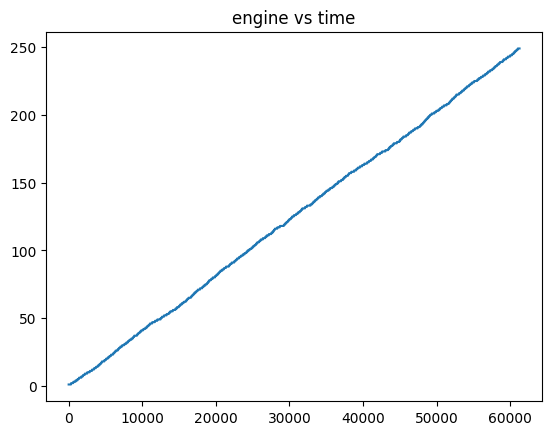

61249


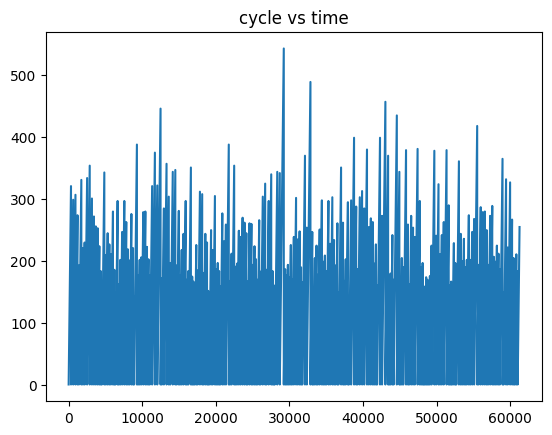

61249


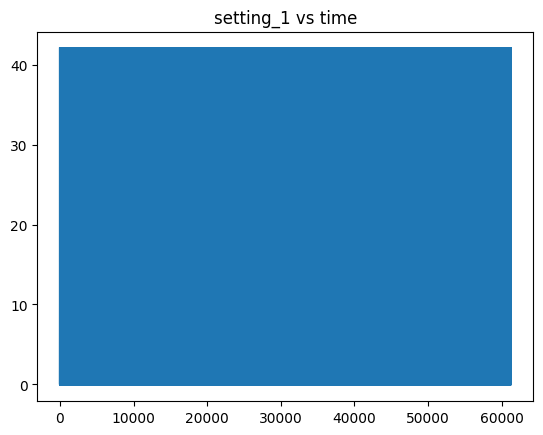

61249


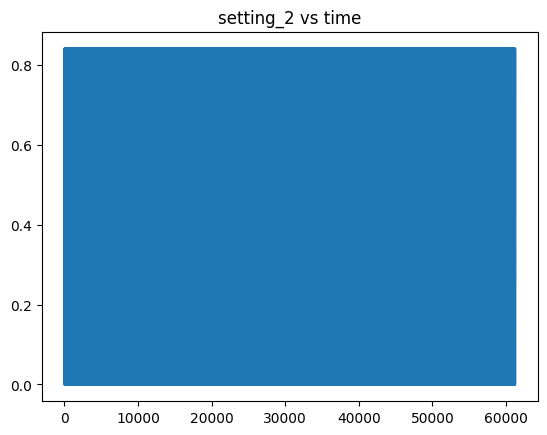

61249


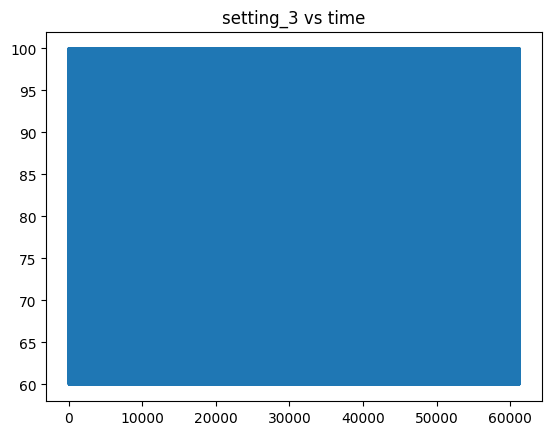

61249


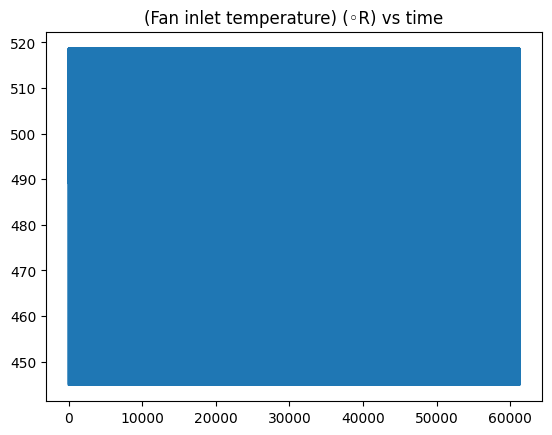

61249


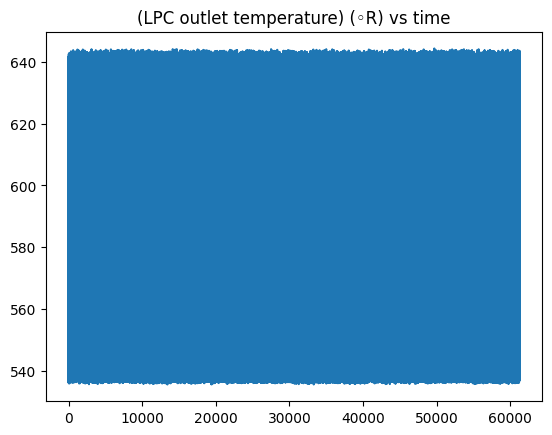

61249


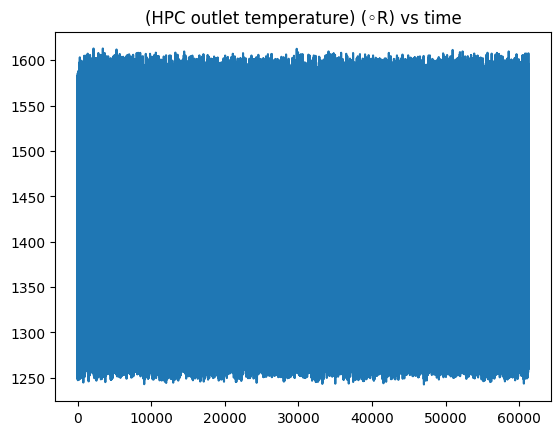

61249


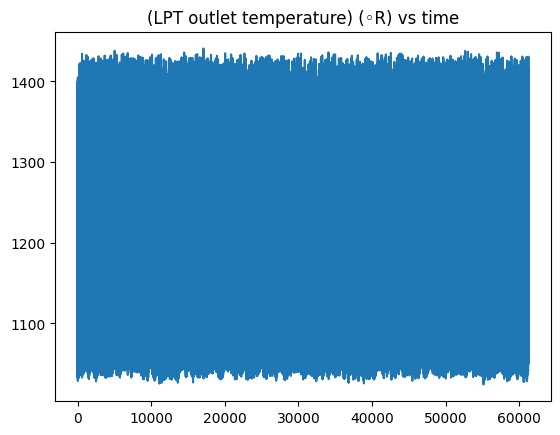

61249


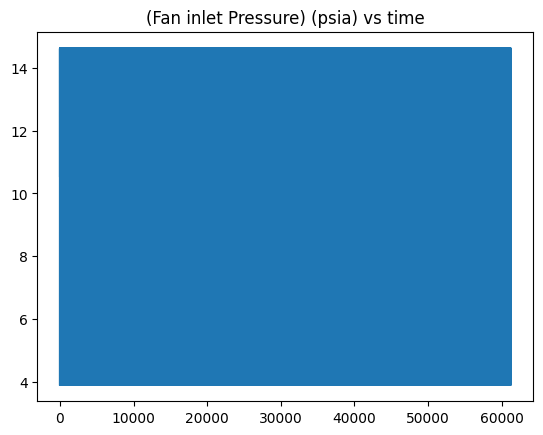

61249


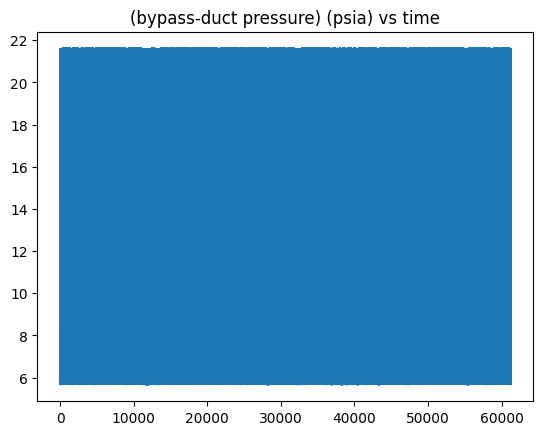

61249


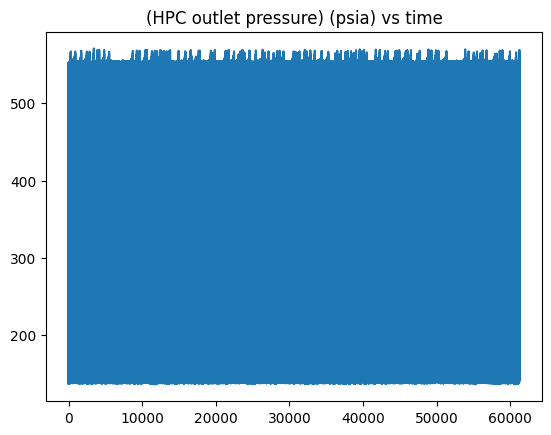

61249


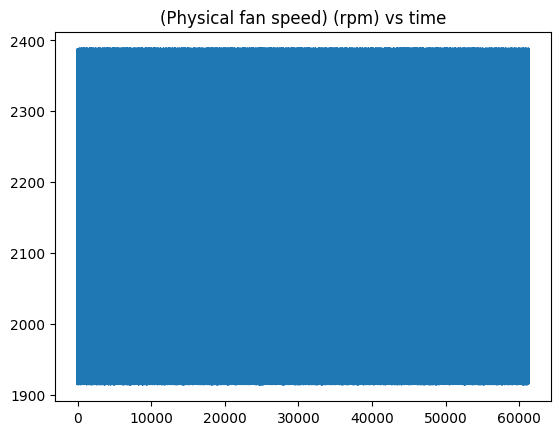

61249


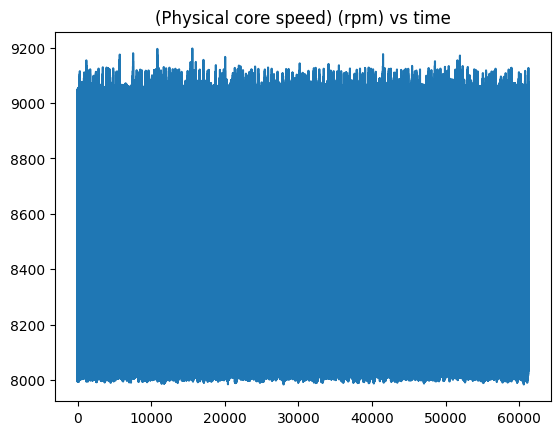

61249


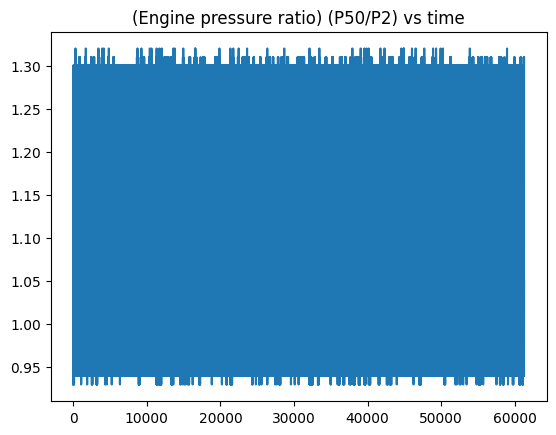

61249


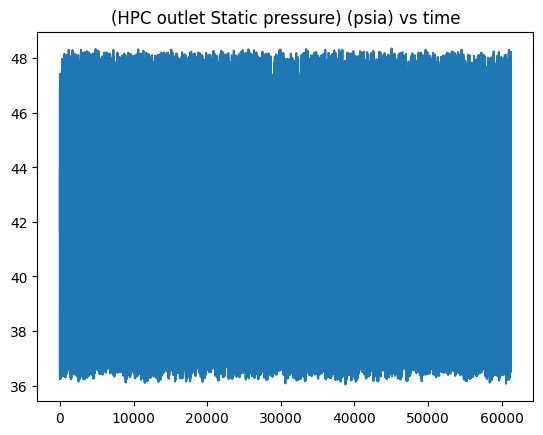

61249


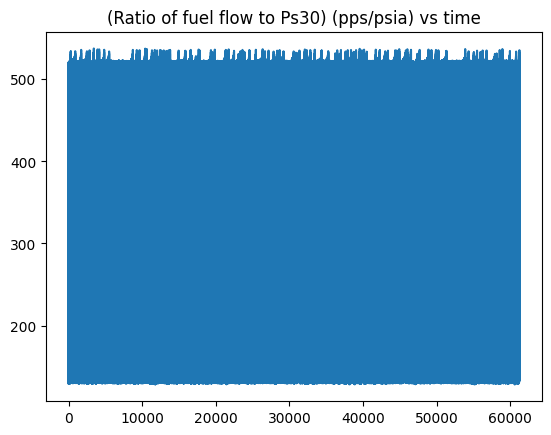

61249


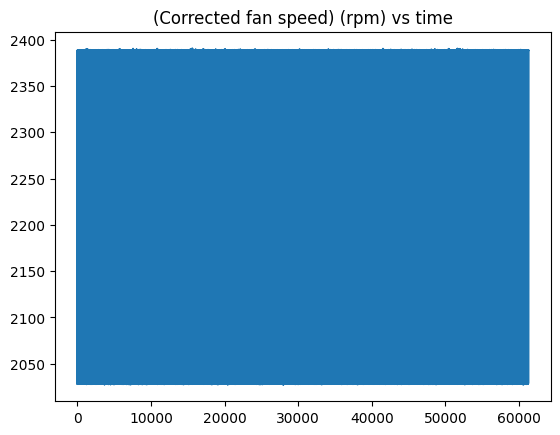

61249


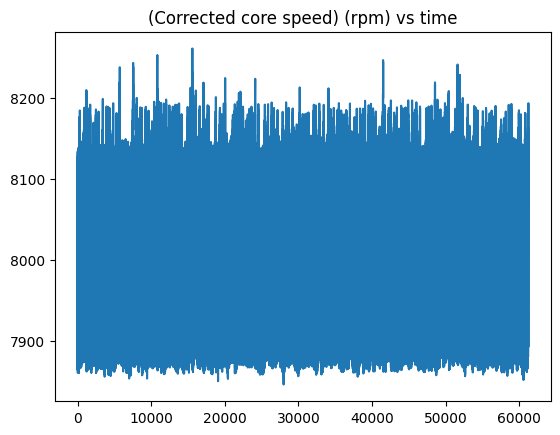

61249


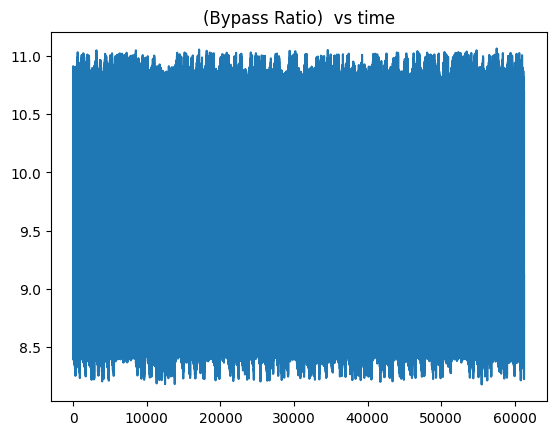

61249


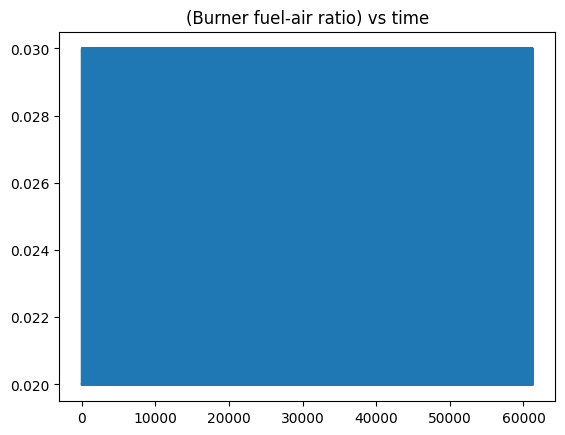

61249


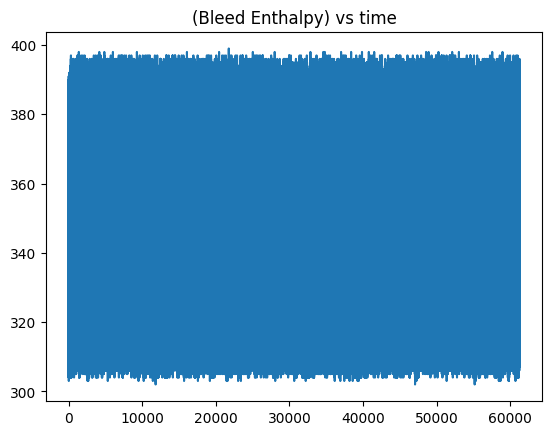

61249


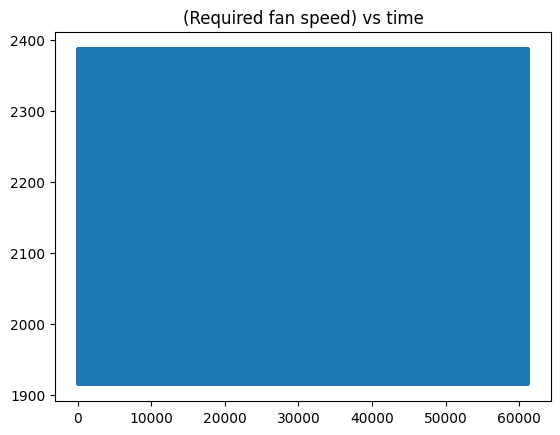

61249


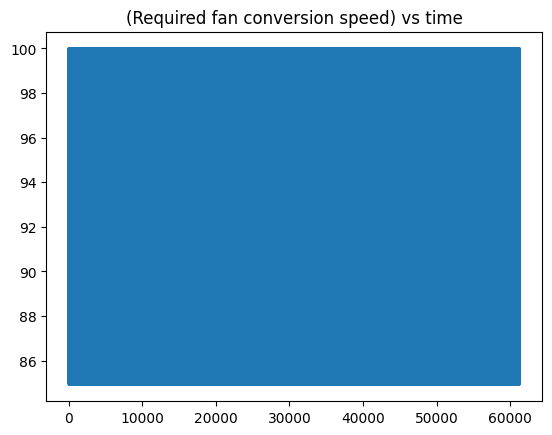

61249


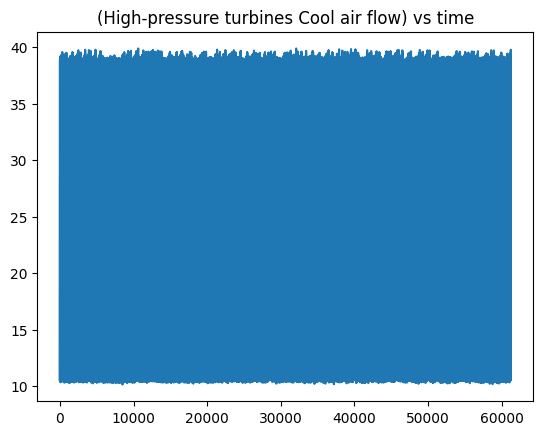

61249


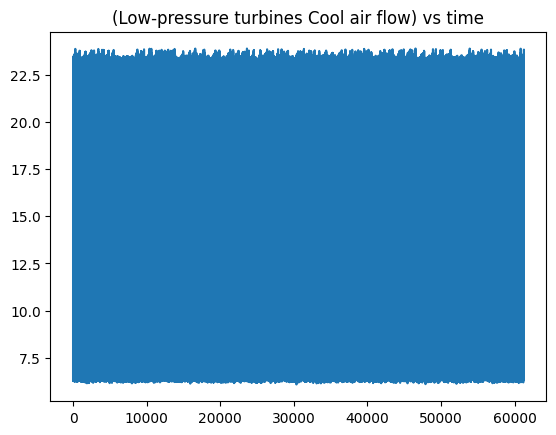

In [ ]:
for i in col_names:
    print(len(df_train[i]))
    plt.plot(range(1, len(df_train[i])+1), df_train[i].to_numpy())
    plt.title(i+" vs time")
    plt.show()

In [ ]:
df_train.nunique() # used to get count of unique values in dataset

engine                                       249
cycle                                        543
setting_1                                    536
setting_2                                    105
setting_3                                      2
(Fan inlet temperature) (◦R)                   6
(LPC outlet temperature) (◦R)               1704
(HPC outlet temperature) (◦R)              13558
(LPT outlet temperature) (◦R)              17353
(Fan inlet Pressure) (psia)                    6
(bypass-duct pressure) (psia)                 46
(HPC outlet pressure) (psia)                5926
(Physical fan speed) (rpm)                  1038
(Physical core speed) (rpm)                25297
(Engine pressure ratio) (P50/P2)              21
(HPC outlet Static pressure) (psia)          737
(Ratio of fuel flow to Ps30) (pps/psia)     5627
(Corrected fan speed) (rpm)                  483
(Corrected core speed) (rpm)               15938
(Bypass Ratio)                             11915
(Burner fuel-air rat

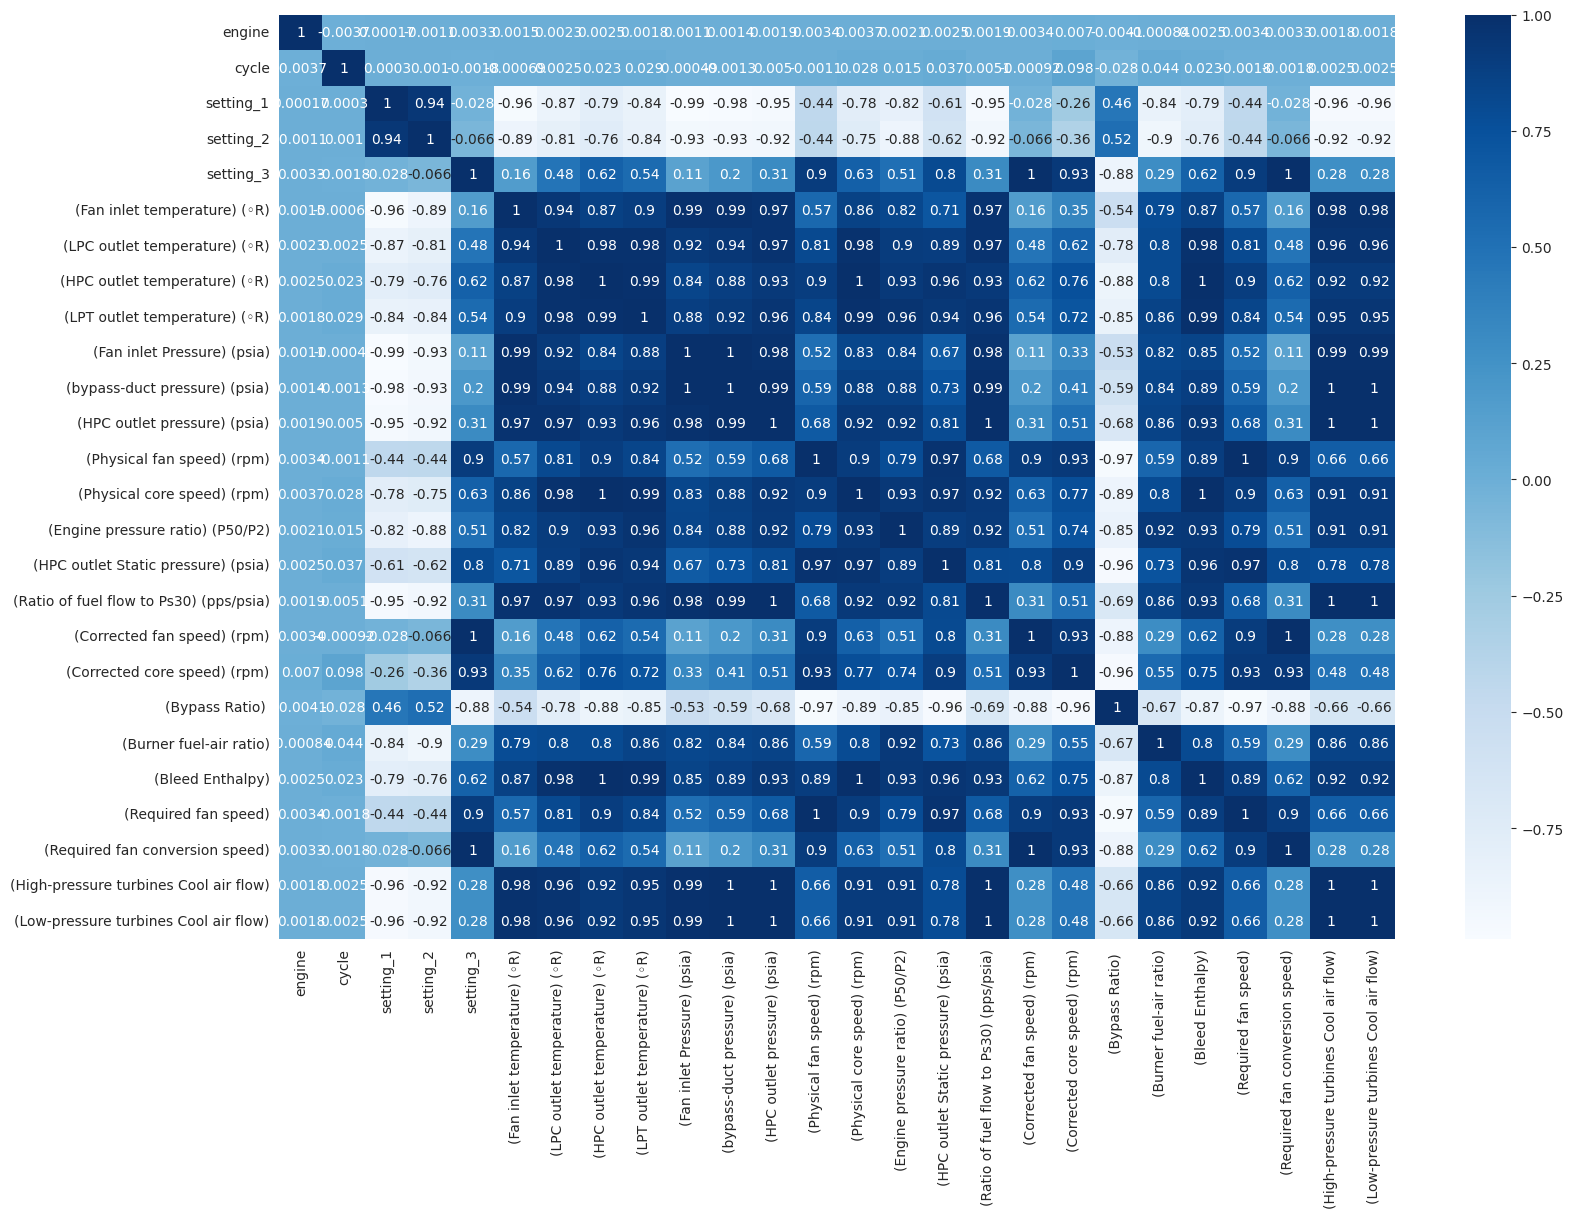

In [ ]:
# correlation metrics
plt.figure(figsize=(18,12))
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
plot_kws={"s": 1}
sns.heatmap(df_train.corr(), cmap='Blues', annot=True, linecolor='lightgrey').set_facecolor('white')

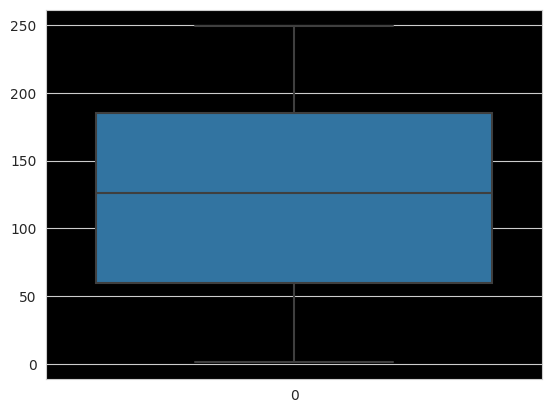

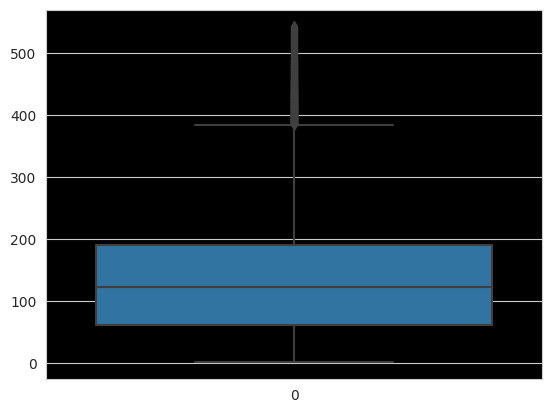

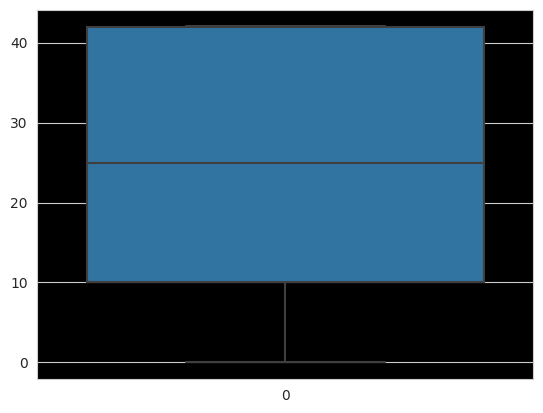

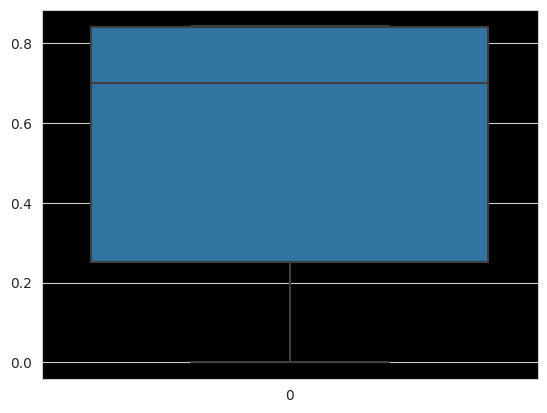

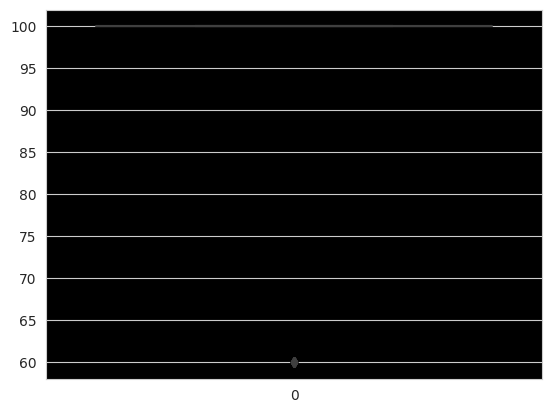

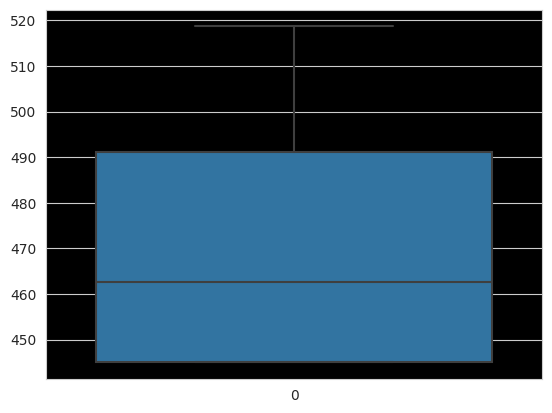

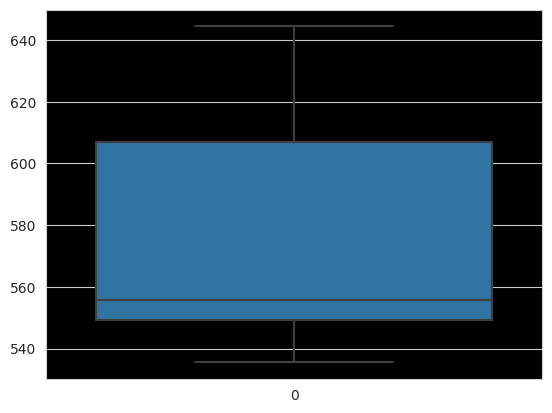

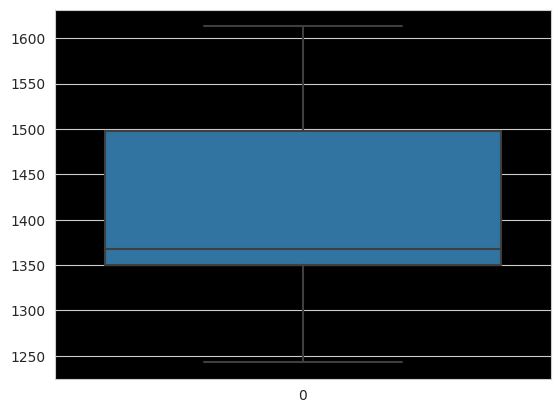

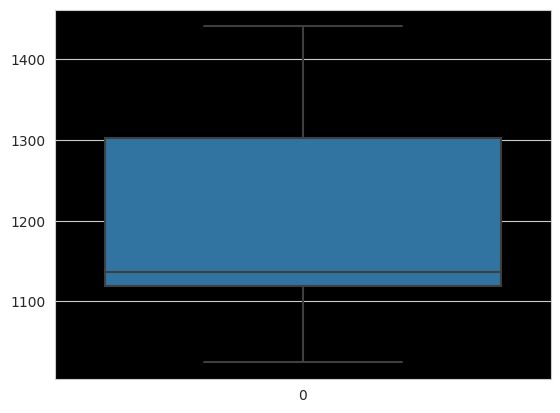

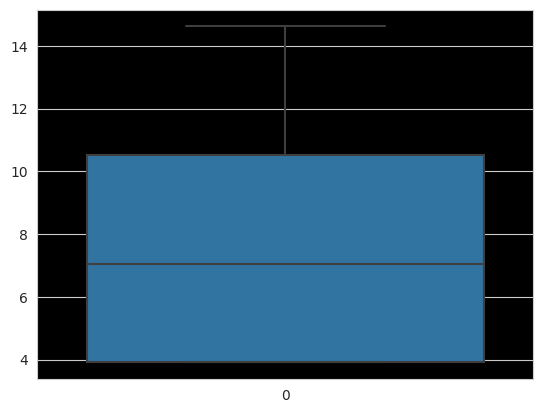

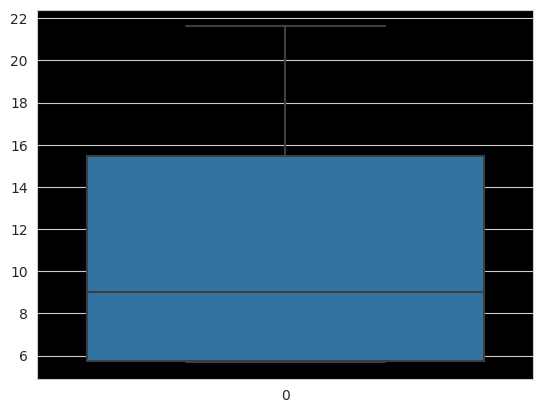

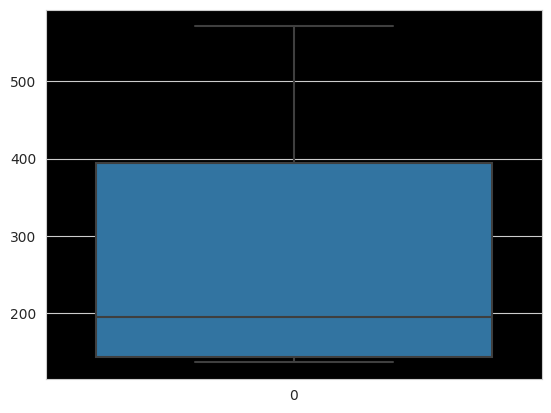

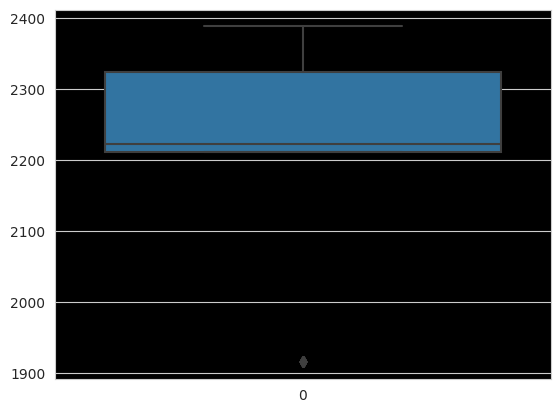

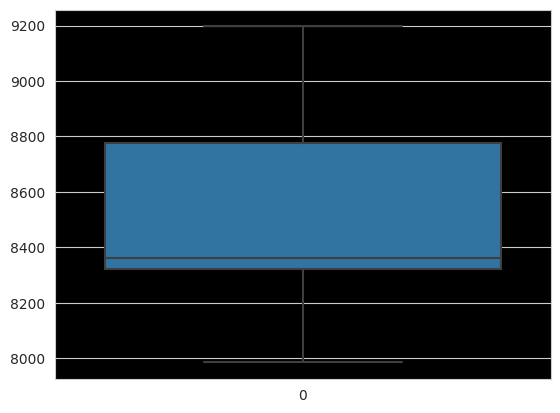

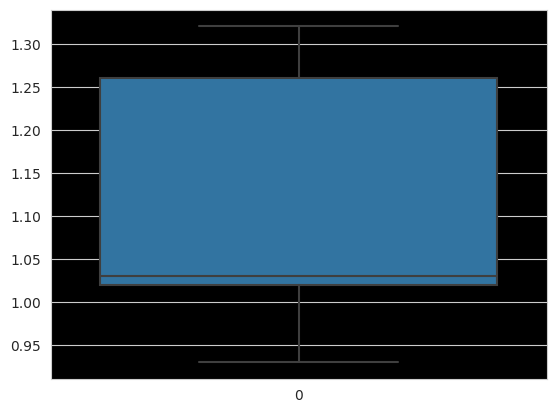

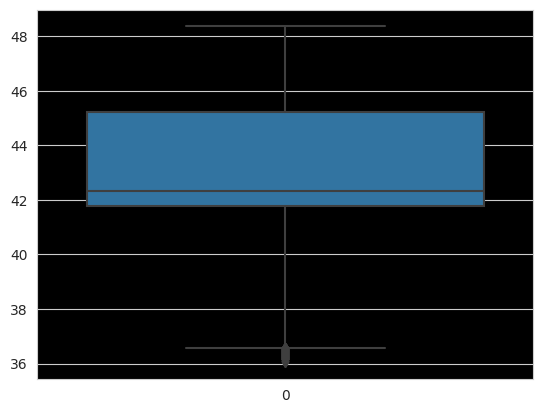

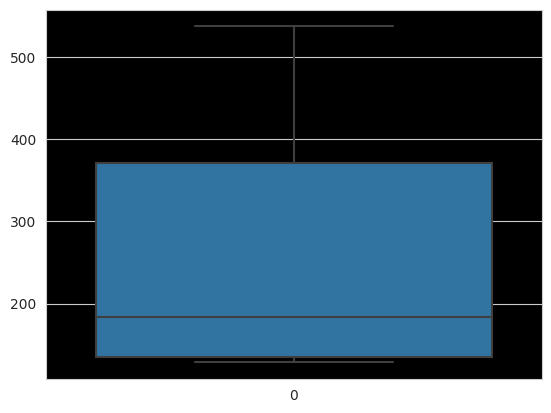

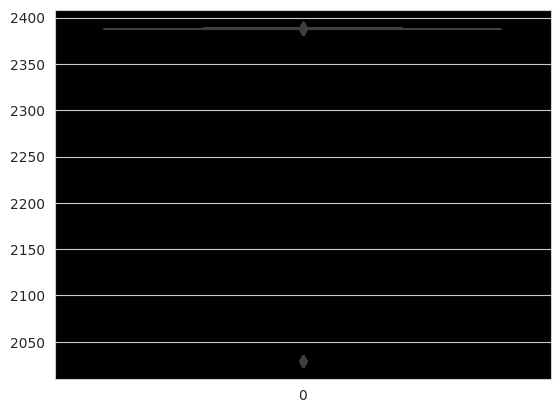

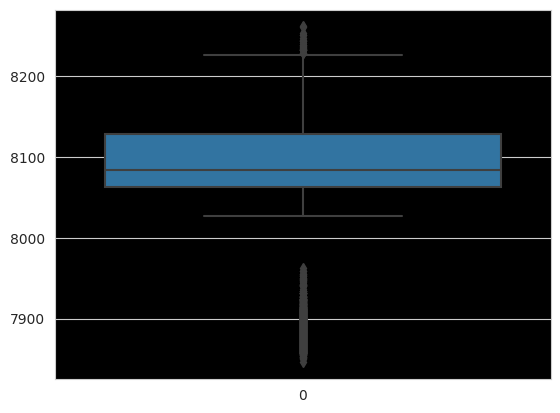

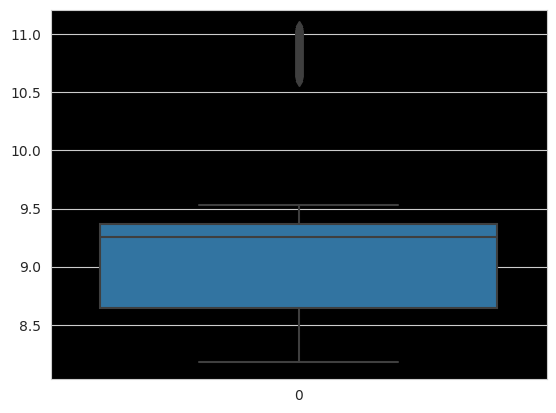

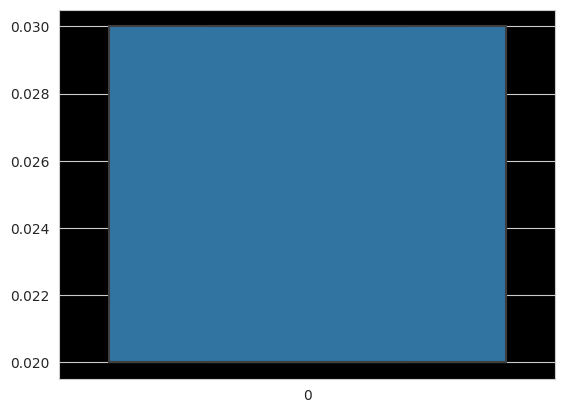

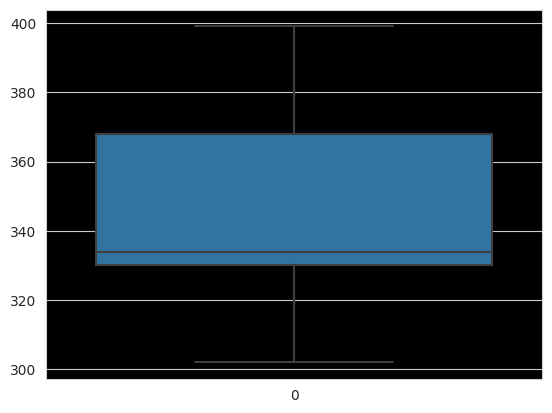

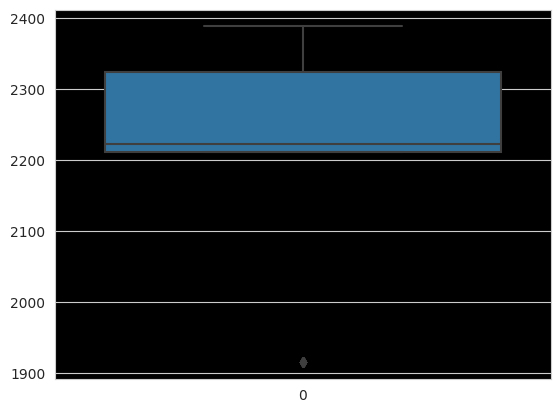

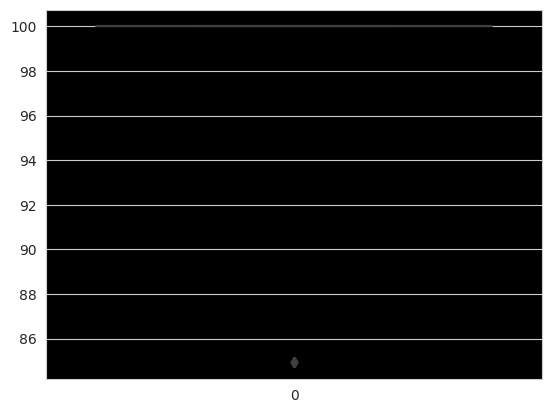

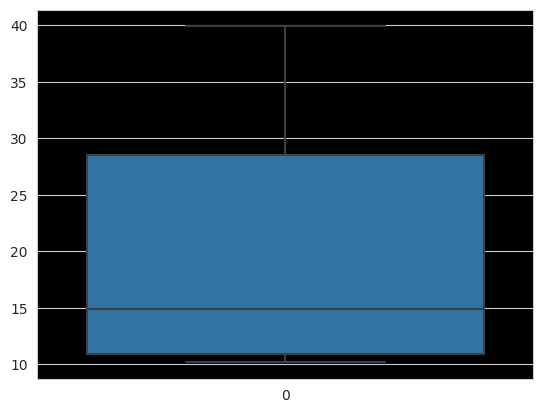

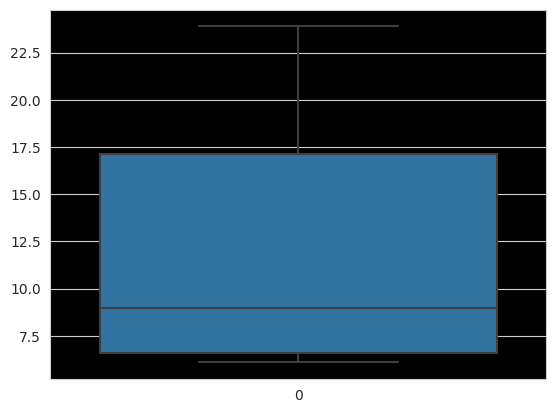

In [ ]:
for i in df_train.select_dtypes(include=np.number):
  sns.boxplot(df_train[i])
  plt.show()

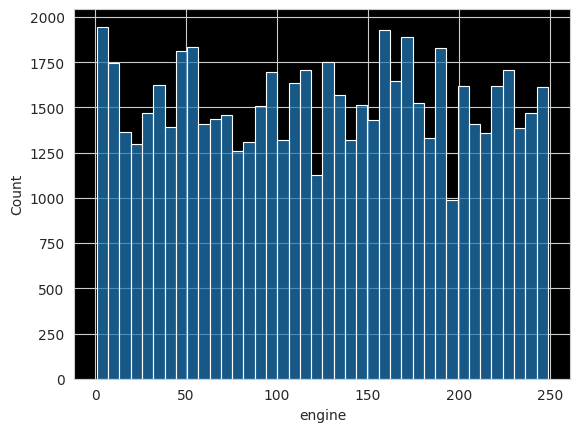

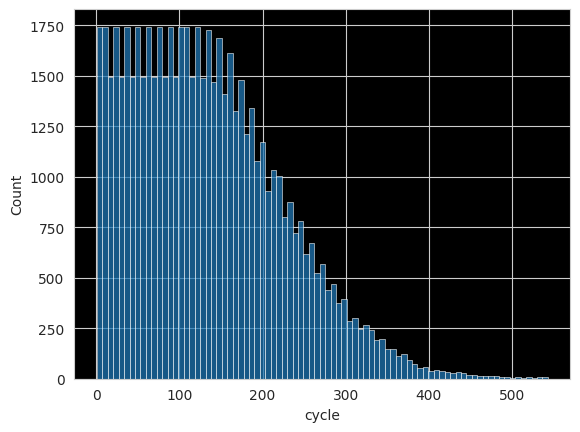

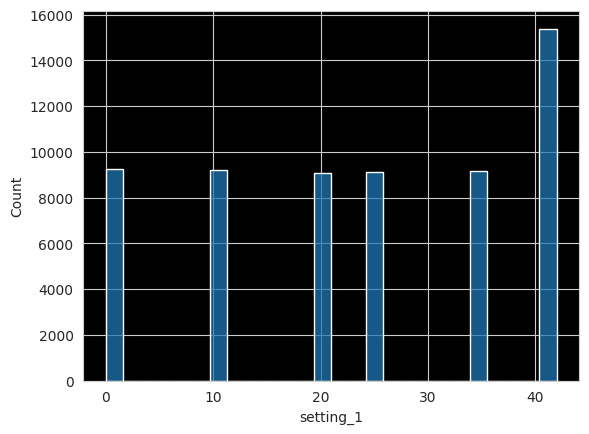

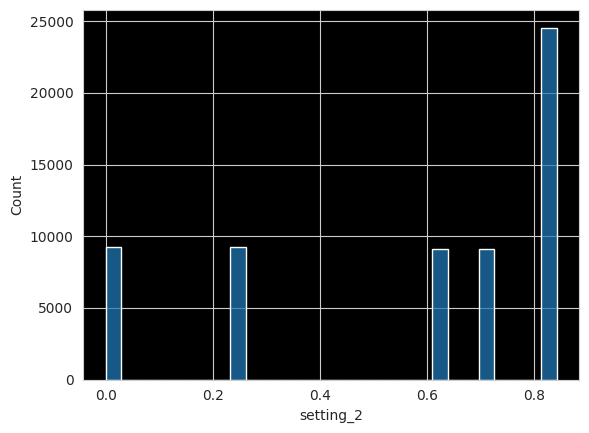

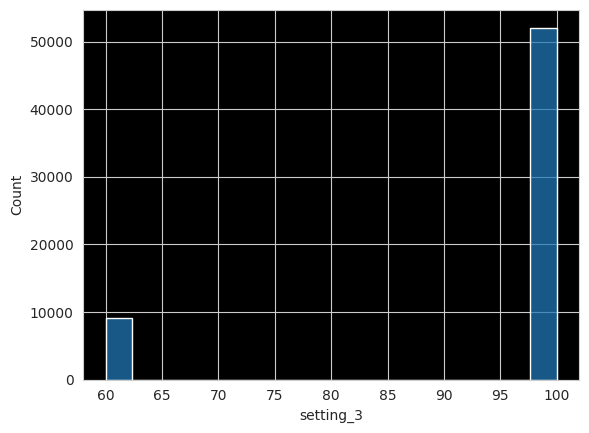

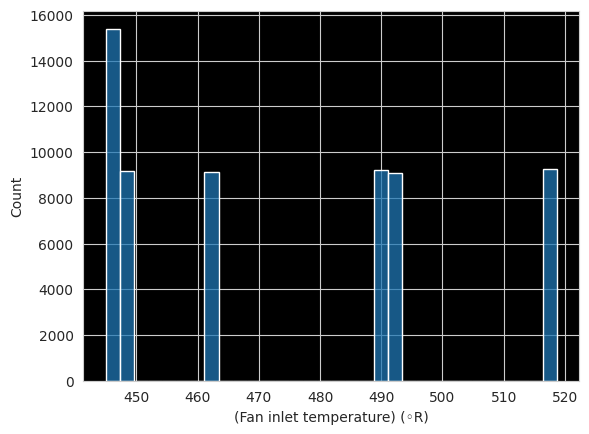

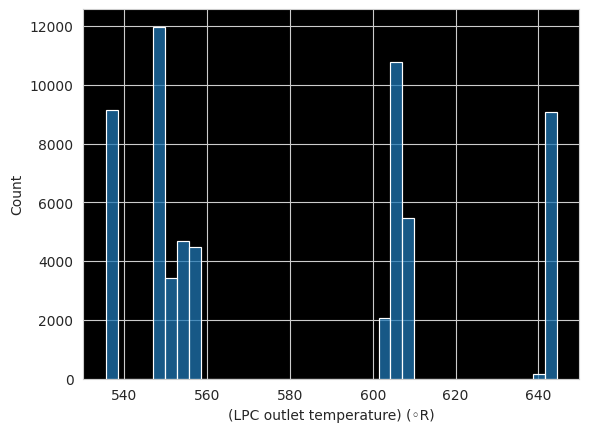

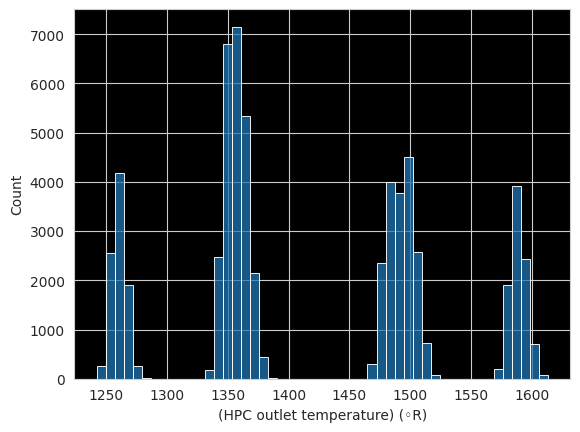

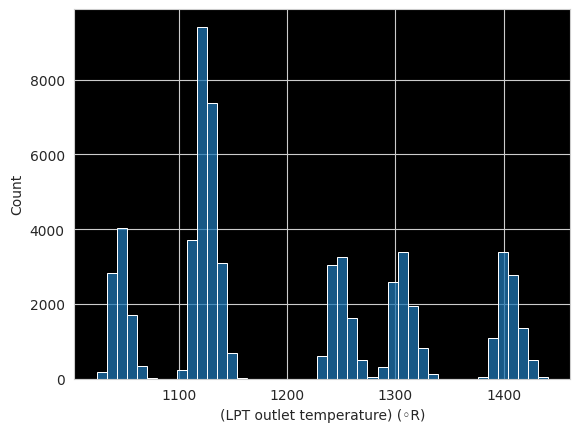

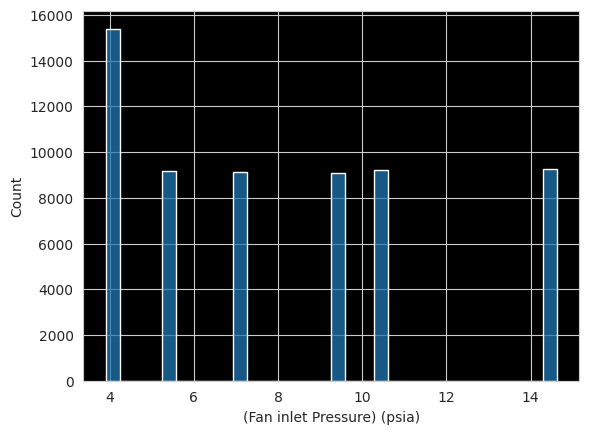

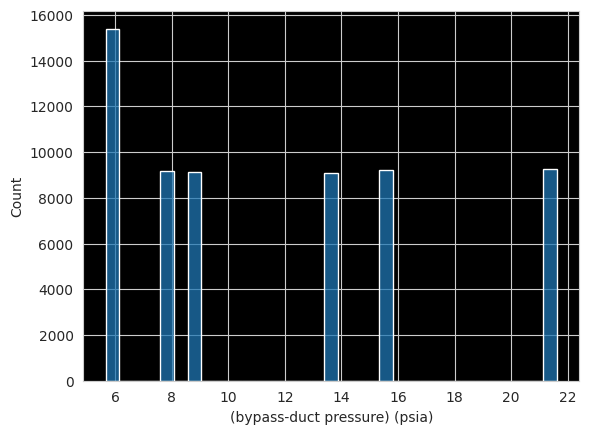

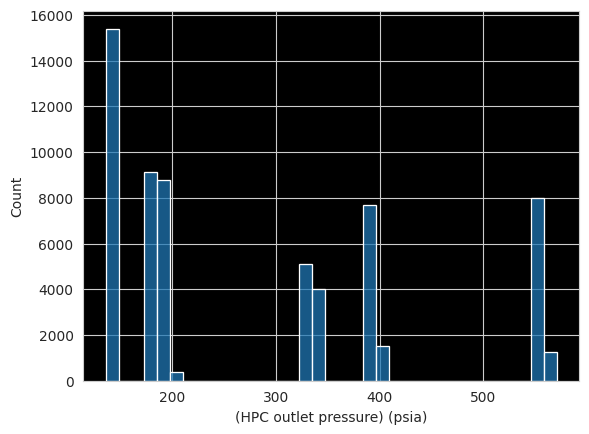

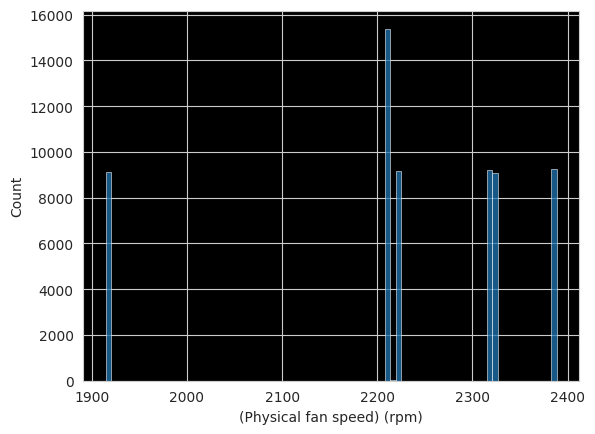

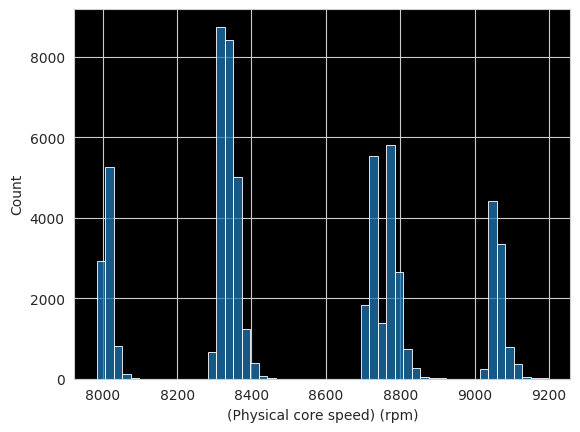

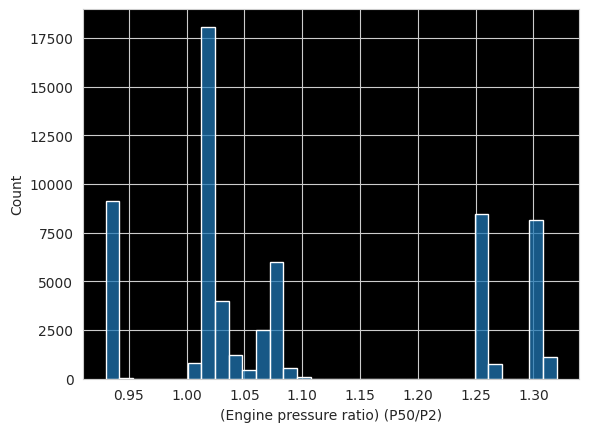

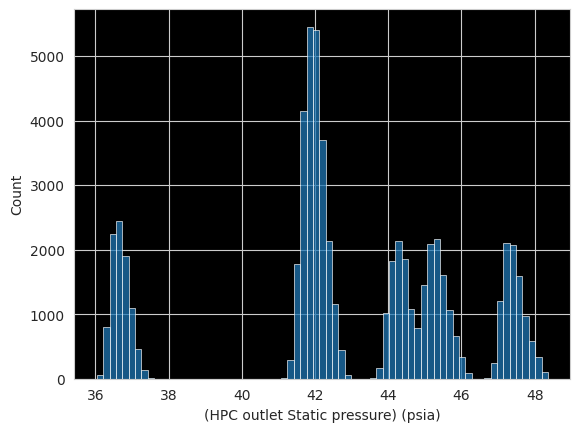

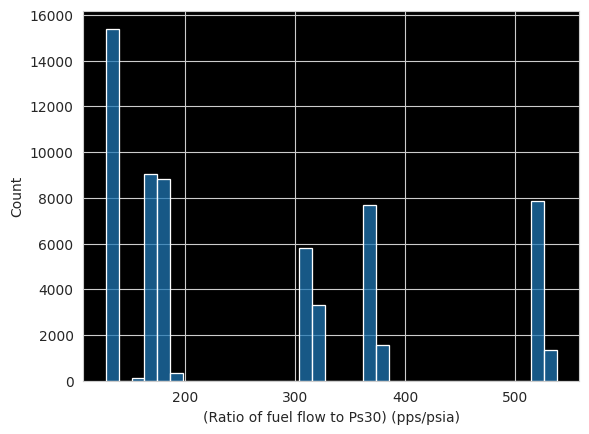

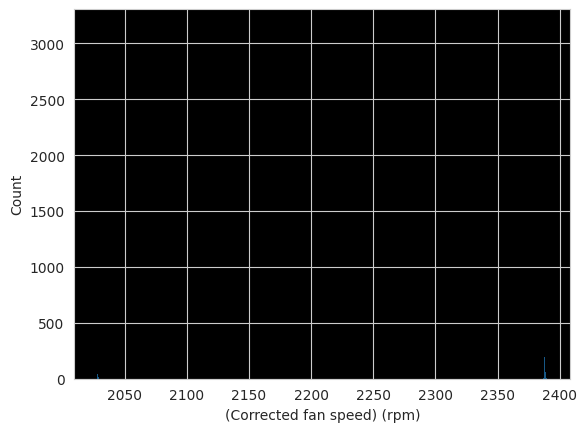

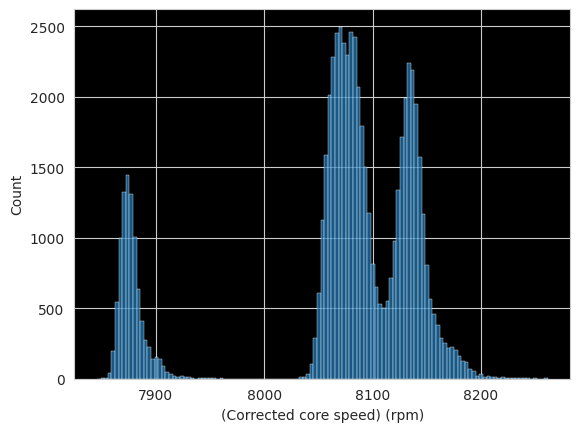

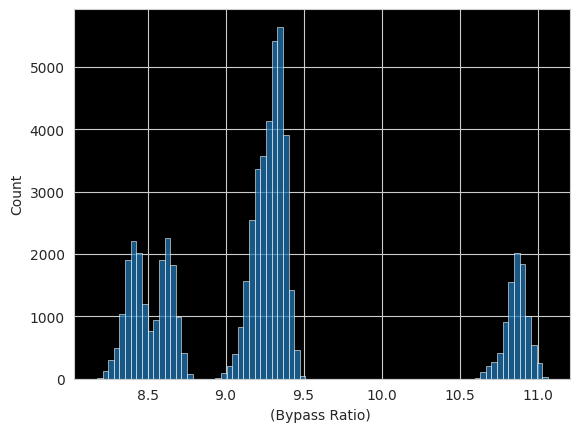

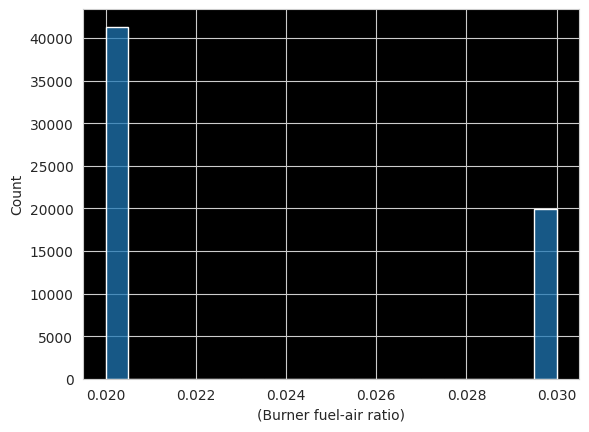

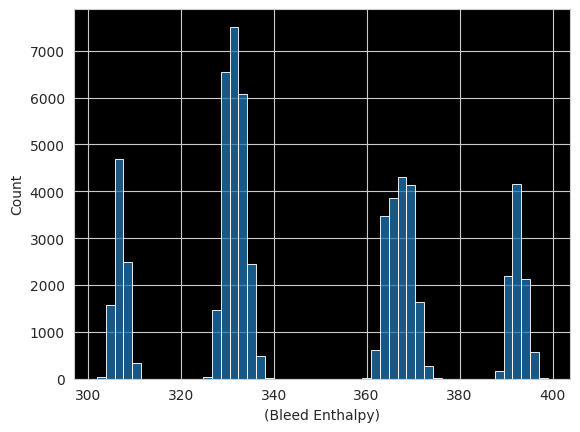

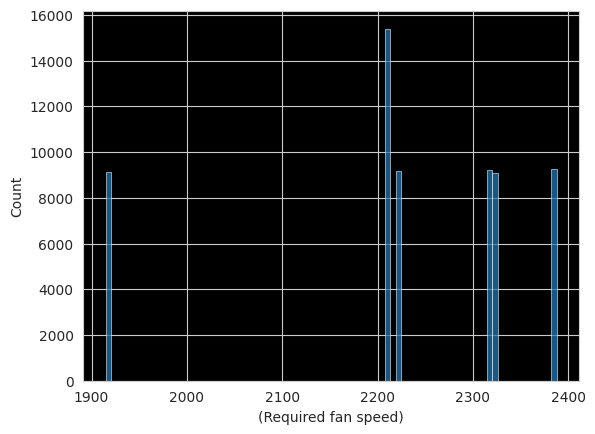

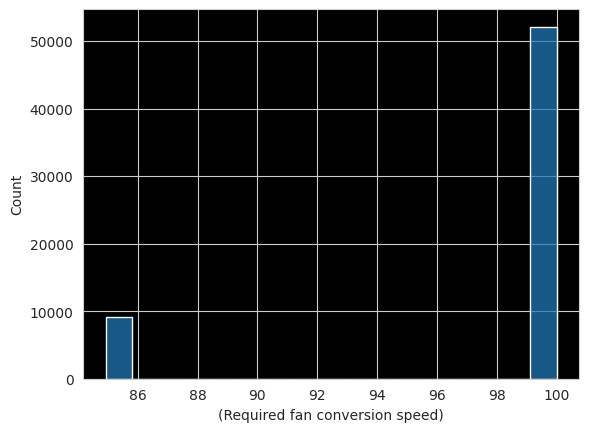

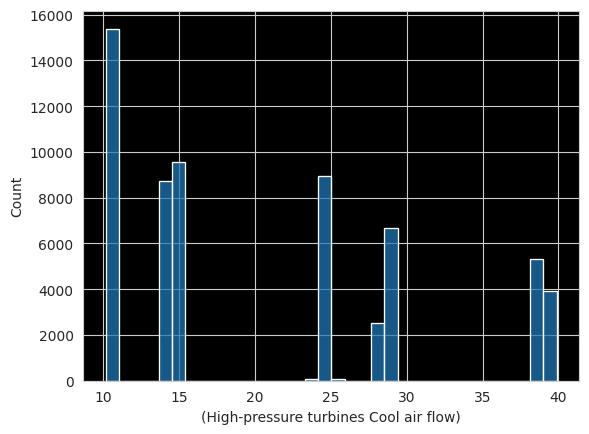

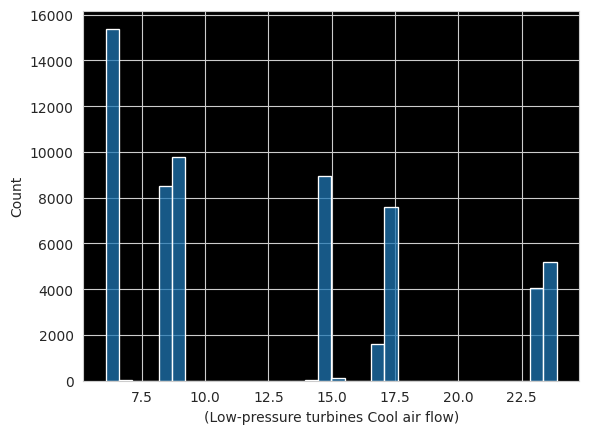

In [ ]:
for i in df_train.select_dtypes(include=np.number):
  sns.histplot(df_train[i])
  plt.show()

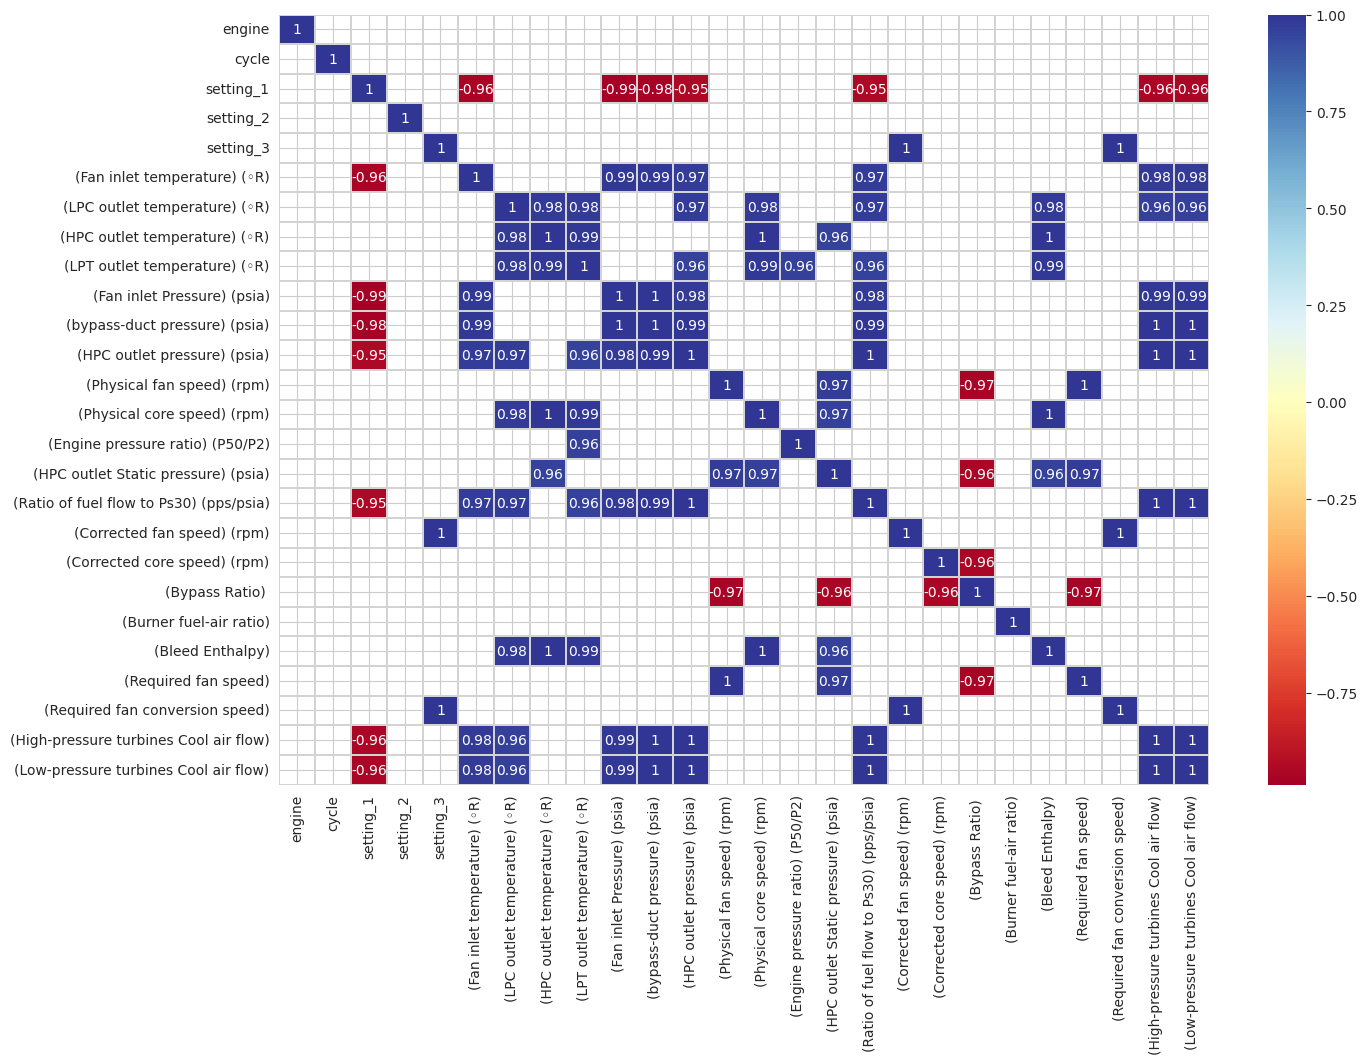

In [ ]:
threshold = 0.95 # threshold for co-relation among columns
plt.figure(figsize=(15,10))

sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2, cmap='RdYlBu', annot=True, mask=mask, linewidths=0.2, linecolor='lightgrey').set_facecolor('white')

Drop one of the highly correlated features and keep the other. The threshold for correlation is set at 0.95

In [ ]:
df_train.drop(['(Corrected fan speed) (rpm)', '(Required fan conversion speed)',
               '(bypass-duct pressure) (psia)', '(Low-pressure turbines Cool air flow)',
               '(HPC outlet pressure) (psia)', '(Ratio of fuel flow to Ps30) (pps/psia)',
               '(Bleed Enthalpy)', '(Physical core speed) (rpm)', '(LPT outlet temperature) (◦R)',
               '(Required fan speed)', '(HPC outlet Static pressure) (psia)',
               '(Fan inlet Pressure) (psia)', '(LPC outlet temperature) (◦R)'],axis=1,inplace=True)

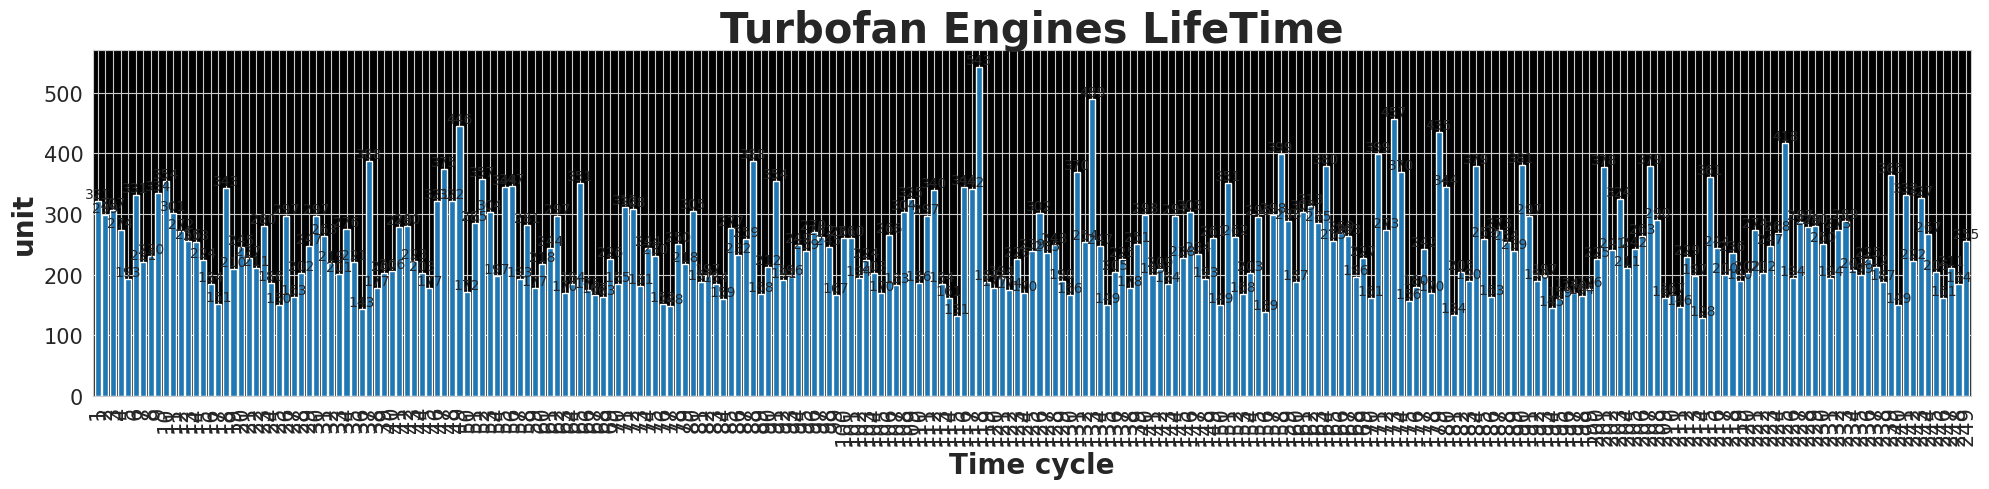

In [ ]:
max_time_cycles=df_train[index_names].groupby('engine').max()
plt.figure(figsize=(20,5))
ax=max_time_cycles['cycle'].plot(kind='bar',width=0.8, stacked=True, align='center')
for l in ax.containers:
    ax.bar_label(l)
plt.title('Turbofan Engines LifeTime', fontweight='bold', size=30)
plt.xlabel('Time cycle', fontweight='bold', size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold', size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_train['cycle'].max()   # define the maximum life of each engine, as this could be used to obtain the RUL at each point in time of the engine's life

data_train_RUL = df_train.groupby(['engine']).agg({'cycle':'max'})
data_train_RUL.rename(columns={'cycle':'life'},inplace=True)
data_train_RUL

,life
engine,
1,321
2,299
3,307
4,274
5,193
...,...
245,205
246,161
247,211


In [ ]:
df_train = df_train.merge(data_train_RUL, how='left', on = ['engine'])

In [ ]:
df_train['RUL']= df_train['life'] - df_train['cycle']
df_train.head()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(HPC outlet temperature) (◦R),(Physical fan speed) (rpm),(Engine pressure ratio) (P50/P2),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(High-pressure turbines Cool air flow),life,RUL
0,1,1,42.0049,0.8400,100.0,445.00,1343.43,2211.86,1.01,8074.83,9.3335,0.02,10.62,321,320
1,1,2,20.0020,0.7002,100.0,491.19,1477.61,2323.66,1.07,8046.13,9.1913,0.02,24.37,321,319
2,1,3,42.0038,0.8409,100.0,445.00,1343.12,2211.92,1.01,8066.62,9.4007,0.02,10.48,321,318
3,1,4,42.0000,0.8400,100.0,445.00,1341.24,2211.88,1.02,8076.05,9.3369,0.02,10.54,321,317
4,1,5,25.0063,0.6207,60.0,462.54,1255.23,1915.22,0.93,7865.80,10.8366,0.02,14.03,321,316


#Problem Formulation
The challange of this competetion was to predict the Remaining Useful Life of the engine by using the given sensor's data and operational conditions. But, we will try to simplify that by converting it to a Classification Problem, where the class labels will be of 3 types, i.e. Good Condition, Moderate Condition and Warning Condition.

Labels corresponding to each conditions:


1.   Good Condition - 0

2.   Moderate Condition - 1
3.   Warning Condition - 2

Defining the labels:
we will define the engine's condition with Life Ratio (LR), which is the ratio between Current Cycle and the End cycle(end_of_life). If LR=0, that means the component has just started its degradation and LR=1 means, it is completely degraded.

if LR <= 0.6 - Good Condition
if LR <= 0.8 - Moderate Condition
if 0.8 < LR - Warning Condition

In [ ]:
df_train["LR"] = df_train["cycle"].div(df_train['life']) #Calculate LR
df_train.head()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(HPC outlet temperature) (◦R),(Physical fan speed) (rpm),(Engine pressure ratio) (P50/P2),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(High-pressure turbines Cool air flow),life,RUL,LR
0,1,1,42.0049,0.8400,100.0,445.00,1343.43,2211.86,1.01,8074.83,9.3335,0.02,10.62,321,320,0.003115
1,1,2,20.0020,0.7002,100.0,491.19,1477.61,2323.66,1.07,8046.13,9.1913,0.02,24.37,321,319,0.006231
2,1,3,42.0038,0.8409,100.0,445.00,1343.12,2211.92,1.01,8066.62,9.4007,0.02,10.48,321,318,0.009346
3,1,4,42.0000,0.8400,100.0,445.00,1341.24,2211.88,1.02,8076.05,9.3369,0.02,10.54,321,317,0.012461
4,1,5,25.0063,0.6207,60.0,462.54,1255.23,1915.22,0.93,7865.80,10.8366,0.02,14.03,321,316,0.015576


In [ ]:
labels=[]
for i in range (0,len(df_train)):
  if np.array(df_train["LR"])[i] <= 0.6:
    labels.append(0)
  elif np.array(df_train["LR"])[i] <= 0.8:
    labels.append(1)
  else :
    labels.append(2)

df_train["labels"]= labels
df_train.head()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(HPC outlet temperature) (◦R),(Physical fan speed) (rpm),(Engine pressure ratio) (P50/P2),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(High-pressure turbines Cool air flow),life,RUL,LR,labels
0,1,1,42.0049,0.8400,100.0,445.00,1343.43,2211.86,1.01,8074.83,9.3335,0.02,10.62,321,320,0.003115,0
1,1,2,20.0020,0.7002,100.0,491.19,1477.61,2323.66,1.07,8046.13,9.1913,0.02,24.37,321,319,0.006231,0
2,1,3,42.0038,0.8409,100.0,445.00,1343.12,2211.92,1.01,8066.62,9.4007,0.02,10.48,321,318,0.009346,0
3,1,4,42.0000,0.8400,100.0,445.00,1341.24,2211.88,1.02,8076.05,9.3369,0.02,10.54,321,317,0.012461,0
4,1,5,25.0063,0.6207,60.0,462.54,1255.23,1915.22,0.93,7865.80,10.8366,0.02,14.03,321,316,0.015576,0


In [ ]:
# Dropping these column because we have used them to create label (now these do not have much significance)
# RUL is not deleted becuase we still have ot use it to delte uncessary features
df_train= df_train.drop(columns=['cycle','life','LR'])
df_train.head()

,engine,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(HPC outlet temperature) (◦R),(Physical fan speed) (rpm),(Engine pressure ratio) (P50/P2),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(High-pressure turbines Cool air flow),RUL,labels
0,1,42.0049,0.8400,100.0,445.00,1343.43,2211.86,1.01,8074.83,9.3335,0.02,10.62,320,0
1,1,20.0020,0.7002,100.0,491.19,1477.61,2323.66,1.07,8046.13,9.1913,0.02,24.37,319,0
2,1,42.0038,0.8409,100.0,445.00,1343.12,2211.92,1.01,8066.62,9.4007,0.02,10.48,318,0
3,1,42.0000,0.8400,100.0,445.00,1341.24,2211.88,1.02,8076.05,9.3369,0.02,10.54,317,0
4,1,25.0063,0.6207,60.0,462.54,1255.23,1915.22,0.93,7865.80,10.8366,0.02,14.03,316,0


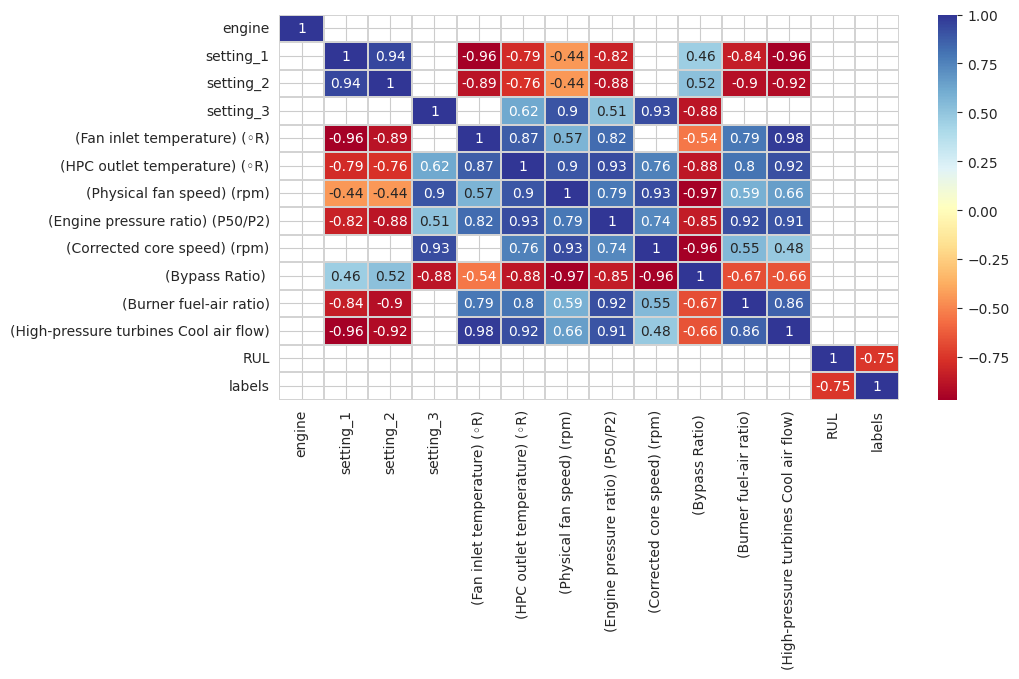

In [ ]:
plt.figure(figsize=(10,5))
threshold = 0.4
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2, cmap='RdYlBu', annot=True, mask=mask, linewidths=0.2, linecolor='lightgrey').set_facecolor('white')

according to data the below columns has less correlation with RUL so we can drop these columns


In [ ]:
df_train.drop(columns=['engine','setting_1','setting_2'], inplace=True)

In [ ]:
Y = df_train["labels"].values
X = df_train.drop(labels = ["labels"], axis=1)

from keras.utils import normalize
X = normalize(X, axis=1)

MinMaxScaler is useful when the data has a bounded range or when the distribution is not Gaussian. For example, in image processing, pixel values are typically in the range of 0-255. Scaling these values using MinMaxScaler ensures that the values are within a fixed range and contributes equally to the analysis.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

print('x_train shape : ',x_train.shape)
print('x_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (48999, 10)
x_test shape :  (12250, 10)
y_train shape :  (48999,)
y_test shape :  (12250,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn import metrics

models= [
         ('Logestic Regression',LogisticRegression(max_iter=900)),
         ('SVM',SVC(kernel='linear')),
         ('Random Forest Classifier',RandomForestClassifier()),
         ('KNeighbors Classifier',KNeighborsClassifier()),
         ('Decision Tree', DecisionTreeClassifier()),
         ('AdaBoost Classifier',AdaBoostClassifier()),
         ('XGB Classifier',XGBClassifier()),
         ('LightGBM Classifier',LGBMClassifier()),
         ('GaussianNB',GaussianNB())]

ModelName = []
Train_Acc = []
Test_Acc = []

for name, model in models:
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred  = model.predict(x_test)

    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    test_acc = metrics.accuracy_score(y_test, y_test_pred)

    ModelName.extend([name])
    Train_Acc.extend([train_acc])
    Test_Acc.extend([test_acc])

print(pd.DataFrame({'ModelName': ModelName,
                    'Train_Acc': Train_Acc,
                    'Test_Acc': Test_Acc  }))

                  ModelName  Train_Acc  Test_Acc
0       Logestic Regression   0.871018  0.872245
1                       SVM   0.875263  0.874612
2  Random Forest Classifier   1.000000  0.893388
3     KNeighbors Classifier   0.917570  0.886776
4             Decision Tree   1.000000  0.857878
5       AdaBoost Classifier   0.832854  0.828816
6            XGB Classifier   0.932897  0.892245
7       LightGBM Classifier   0.915549  0.893061
8                GaussianNB   0.846711  0.848653


In [ ]:
df_train['labels'].value_counts()

0    36655
2    12346
1    12248
Name: labels, dtype: int64

#Handling Imbalance dataset

In [ ]:
from imblearn.over_sampling import SMOTE
X_smote, Y_smote = SMOTE().fit_resample(X, Y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)

Original data:  [0 1 2] [36655 12248 12346]
After SMOTE:  [0 1 2] [36655 36655 36655]


LOGISTIC REGRESSION


In [ ]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smote, y_train_smote)
LR_prediction_smote = model_LR.predict(X_test_smote)

accuracy = metrics.accuracy_score(y_test_smote, LR_prediction_smote)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smote, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smote, LR_prediction_smote)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, LR_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, LR_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy: 0.7765652707679717

Count of predicted label: [0 1 2] [7293 4971 9729]

Confusion Metrics: 
 [[6403 1090   27]
 [ 890 3695 2721]
 [   0  186 6981]]

Precision Values for:  0.7809565876118533
Recall Values for:  0.7765652707679717
F-Measure Values for:  0.7787547386945689


RANDOM FOREST

In [ ]:
model_SMOTE = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_SMOTE.fit(X_train_smote, y_train_smote)

RF_prediction_smote = model_SMOTE.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, RF_prediction_smote))
print()

(unique, counts) = np.unique(RF_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, RF_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, RF_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, RF_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.9169281134906562

Count of predicted labels:  [0 1 2] [7234 7737 7022]

Confusion Metrics after SMOTE: 
 [[6756  764    0]
 [ 478 6608  220]
 [   0  365 6802]]

Precision Values for:  0.9187219396056131
Recall Values for:  0.9169281134906562
F-Measure Values for:  0.9178241500705824


KNN

In [ ]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smote, y_train_smote)

KNN_prediction_smote = model_KNN.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, KNN_prediction_smote))
print()

(unique, counts) = np.unique(KNN_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, KNN_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, KNN_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, KNN_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.894330014095394

Count of predicted labels:  [0 1 2] [7024 7903 7066]

Confusion Metrics after SMOTE: 
 [[6505 1012    3]
 [ 517 6445  344]
 [   2  446 6719]]

Precision Values for:  0.897445984164419
Recall Values for:  0.894330014095394
F-Measure Values for:  0.8958852897316669


Decision Tree


In [ ]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smote, y_train_smote)

DT_prediction_smote = model_DT.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, DT_prediction_smote))
print()

(unique, counts) = np.unique(DT_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, DT_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, DT_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, DT_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.8871459100622926

Count of predicted labels:  [0 1 2] [7389 7483 7121]

Confusion Metrics after SMOTE: 
 [[6626  888    6]
 [ 754 6161  391]
 [   9  434 6724]]

Precision Values for:  0.8878360515220644
Recall Values for:  0.8871459100622926
F-Measure Values for:  0.8874908466231433


ADABOOST

In [ ]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smote, y_train_smote)

AdaBoost_prediction_smote = model_AdaBoost.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, AdaBoost_prediction_smote))
print()

(unique, counts) = np.unique(AdaBoost_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, AdaBoost_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, AdaBoost_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, AdaBoost_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.8300822989132906

Count of predicted labels:  [0 1 2] [7720 6728 7545]

Confusion Metrics after SMOTE: 
 [[6625  895    0]
 [1094 5149 1063]
 [   1  684 6482]]

Precision Values for:  0.8276257097114963
Recall Values for:  0.8300822989132906
F-Measure Values for:  0.8288521840791331


XGBoost

In [ ]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smote, y_train_smote)

XGB_prediction_smote = model_XGB.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, XGB_prediction_smote))
print()

(unique, counts) = np.unique(XGB_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, XGB_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, XGB_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, XGB_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.8931932887737007

Count of predicted labels:  [0 1 2] [7267 7757 6969]

Confusion Metrics after SMOTE: 
 [[6681  839    0]
 [ 586 6357  363]
 [   0  561 6606]]

Precision Values for:  0.8954977728546616
Recall Values for:  0.8931932887737007
F-Measure Values for:  0.894344046307719


LIGHT GBM

In [ ]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_smote, y_train_smote)

LGBM_prediction_smote = model_LGBM.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, LGBM_prediction_smote))
print()

(unique, counts) = np.unique(LGBM_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, LGBM_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, LGBM_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, LGBM_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.889101077615605

Count of predicted labels:  [0 1 2] [7282 7767 6944]

Confusion Metrics after SMOTE: 
 [[6669  851    0]
 [ 613 6317  376]
 [   0  599 6568]]

Precision Values for:  0.8915542702042244
Recall Values for:  0.889101077615605
F-Measure Values for:  0.8903259840394173


Gaussian Naive Bayes

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train_smote, y_train_smote)

NB_prediction_smote = model_NB.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, NB_prediction_smote))
print()

(unique, counts) = np.unique(NB_prediction_smote, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smote, NB_prediction_smote)
print("Confusion Metrics after SMOTE: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smote, NB_prediction_smote, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smote, NB_prediction_smote, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

Accuracy =  0.8238985131632792

Count of predicted labels:  [0 1 2] [6465 7967 7561]

Confusion Metrics after SMOTE: 
 [[5934 1586    0]
 [ 531 5700 1075]
 [   0  681 6486]]

Precision Values for:  0.8310577221451548
Recall Values for:  0.8238985131632792
F-Measure Values for:  0.827462632570034


#SMOTE-ENN

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, Y)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(y_resampled, return_counts=True)
print("After SMOTEENN: ", unique2, counts2)

X_train_smoteenn, X_test_smoteenn, y_train_smoteenn, y_test_smoteenn = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Original data:  [0 1 2] [36655 12248 12346]
After SMOTEENN:  [0 1 2] [28250 27163 33357]


LOGISTIC REGRESSION


Accuracy: 0.746479666554016

Count of predicted label: [0 1 2] [ 5627  1594 10533]

Confusion Metrics: 
 [[5294  269   36]
 [ 333 1323 3861]
 [   0    2 6636]]

Precision Values for:  0.7901751792733639
Recall Values for:  0.746479666554016
F-Measure Values for:  0.767706171551684


<Axes: >

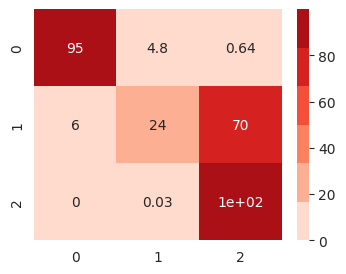

In [ ]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smoteenn, y_train_smoteenn)
LR_prediction_smoteenn = model_LR.predict(X_test_smoteenn)

accuracy = metrics.accuracy_score(y_test_smoteenn, LR_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smoteenn, LR_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, LR_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, LR_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, LR_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

RANDOM FOREST

Accuracy: 0.976906612594345

Count of predicted label: [0 1 2] [5540 5623 6591]

Confusion Metrics: 
 [[5467  132    0]
 [  73 5365   79]
 [   0  126 6512]]

Precision Values for:  0.9771050363393177
Recall Values for:  0.976906612594345
F-Measure Values for:  0.9770058143921773


<Axes: >

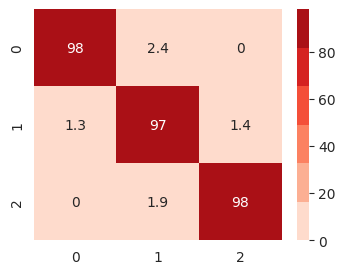

In [ ]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train_smoteenn, y_train_smoteenn)

RF_prediction_smoteenn = model_RF.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, RF_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(RF_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, RF_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, RF_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, RF_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, RF_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

KNN

Accuracy: 0.9797228793511321

Count of predicted label: [0 1 2] [5524 5623 6607]

Confusion Metrics: 
 [[5467  132    0]
 [  57 5390   70]
 [   0  101 6537]]

Precision Values for:  0.9799081886902558
Recall Values for:  0.9797228793511321
F-Measure Values for:  0.979815525258955


<Axes: >

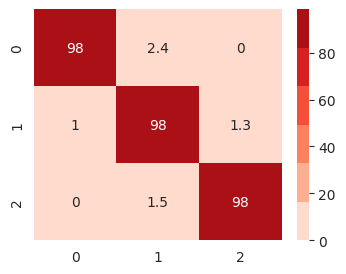

In [ ]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smoteenn, y_train_smoteenn)

KNN_prediction_smoteenn = model_KNN.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, KNN_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(KNN_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, KNN_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, KNN_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, KNN_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, KNN_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

Decision Tree


Accuracy: 0.9678382336374901

Count of predicted label: [0 1 2] [5581 5534 6639]

Confusion Metrics: 
 [[5453  146    0]
 [ 128 5240  149]
 [   0  148 6490]]

Precision Values for:  0.9678671149091163
Recall Values for:  0.9678382336374901
F-Measure Values for:  0.9678526740578449


<Axes: >

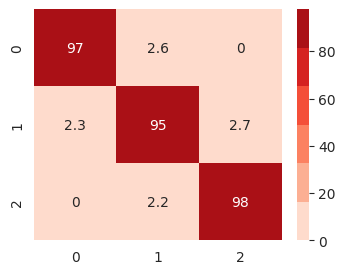

In [ ]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smoteenn, y_train_smoteenn)

DT_prediction_smoteenn = model_DT.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, DT_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(DT_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, DT_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, DT_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, DT_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, DT_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

ADABOOST

Accuracy: 0.8861664976906612

Count of predicted label: [0 1 2] [5584 5682 6488]

Confusion Metrics: 
 [[5218  381    0]
 [ 366 4589  562]
 [   0  712 5926]]

Precision Values for:  0.8871670226366608
Recall Values for:  0.8861664976906612
F-Measure Values for:  0.8866664779127036


<Axes: >

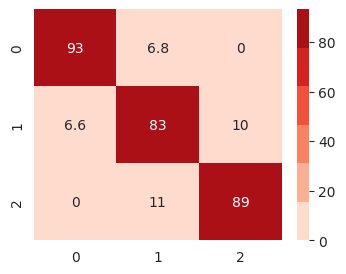

In [ ]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smoteenn, y_train_smoteenn)

AdaBoost_prediction_smoteenn = model_AdaBoost.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, AdaBoost_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(AdaBoost_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, AdaBoost_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, AdaBoost_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, AdaBoost_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, AdaBoost_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

XGBoost

Accuracy: 0.9671060042807255

Count of predicted label: [0 1 2] [5565 5623 6566]

Confusion Metrics: 
 [[5444  155    0]
 [ 121 5278  118]
 [   0  190 6448]]

Precision Values for:  0.967357803538207
Recall Values for:  0.9671060042807255
F-Measure Values for:  0.9672318875217557


<Axes: >

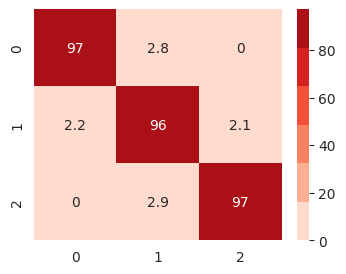

In [ ]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smoteenn, y_train_smoteenn)

XGB_prediction_smoteenn = model_XGB.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, XGB_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(XGB_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, XGB_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, XGB_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, XGB_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, XGB_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

LIGHT GBM

Accuracy: 0.9628252788104089

Count of predicted label: [0 1 2] [5587 5585 6582]

Confusion Metrics: 
 [[5446  153    0]
 [ 141 5221  155]
 [   0  211 6427]]

Precision Values for:  0.9629835686093347
Recall Values for:  0.9628252788104089
F-Measure Values for:  0.9629044172046414


<Axes: >

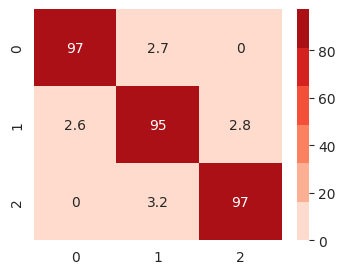

In [ ]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_smoteenn, y_train_smoteenn)

LGBM_prediction_smoteenn = model_LGBM.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, LGBM_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(LGBM_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, LGBM_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, LGBM_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, LGBM_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, LGBM_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

Gaussian Naive Bayes

Accuracy: 0.9048665089557283

Count of predicted label: [0 1 2] [5456 5590 6708]

Confusion Metrics: 
 [[5202  397    0]
 [ 254 4709  554]
 [   0  484 6154]]

Precision Values for:  0.9054651857444912
Recall Values for:  0.9048665089557283
F-Measure Values for:  0.9051657483588866


<Axes: >

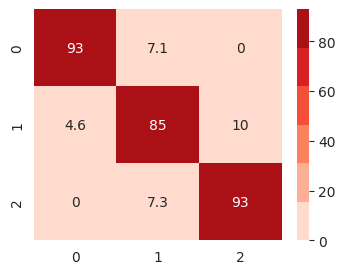

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train_smoteenn, y_train_smoteenn)

NB_prediction_smoteenn = model_NB.predict(X_test_smoteenn)
accuracy = metrics.accuracy_score(y_test_smoteenn, NB_prediction_smoteenn)
print("Accuracy:", accuracy)
print()

(unique, counts) = np.unique(NB_prediction_smoteenn, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteenn, NB_prediction_smoteenn)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteenn, NB_prediction_smoteenn, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteenn, NB_prediction_smoteenn, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteenn, NB_prediction_smoteenn, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

#SMOTE-Tomek

In [ ]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, Y)

(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

(unique2, counts2) = np.unique(y_resampled, return_counts=True)
print("After SMOTE-tomek: ", unique2, counts2)

X_train_smoteTomek, X_test_smoteTomek, y_train_smoteTomek, y_test_smoteTomek = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Original data:  [0 1 2] [36655 12248 12346]
After SMOTE-tomek:  [0 1 2] [35500 35246 36363]


Logistic Regression

Accuracy of Logistic Regression after SMOTETomek: 0.7678554756792083

Count of predicted label: [0 1 2] [ 6981  4302 10139]

Confusion Metrics: 
 [[6162  924   45]
 [ 819 3245 3052]
 [   0  133 7042]]

Precision Values for:  0.7770221996117243
Recall Values for:  0.7678554756792083
F-Measure Values for:  0.7724116416968811


<Axes: >

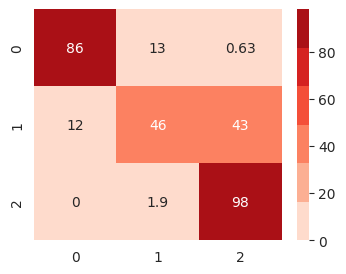

In [ ]:
model_LR = LogisticRegression(max_iter=900)
model_LR.fit(X_train_smoteTomek, y_train_smoteTomek)
LR_prediction_smoteTomek = model_LR.predict(X_test_smoteTomek)

accuracy = metrics.accuracy_score(y_test_smoteTomek, LR_prediction_smoteTomek)
print("Accuracy of Logistic Regression after SMOTETomek:", accuracy)
print()

(unique, counts) = np.unique(LR_prediction_smoteTomek, return_counts=True)
print("Count of predicted label:" ,unique, counts)
print()

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smoteTomek, LR_prediction_smoteTomek)
print("Confusion Metrics: \n", cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, LR_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, LR_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, LR_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

RANDOM FOREST

Accuracy of Random Forest after SMOTETomek =  0.9253571095135842

Count of predicted labels:  [0 1 2] [6851 7482 7089]

Confusion Metrics after SMOTETomek: 
 [[6479  651    1]
 [ 372 6500  244]
 [   0  331 6844]]

Precision Values for:  0.9267510530368804
Recall Values for:  0.9253571095135842
F-Measure Values for:  0.9260535567166278


<Axes: >

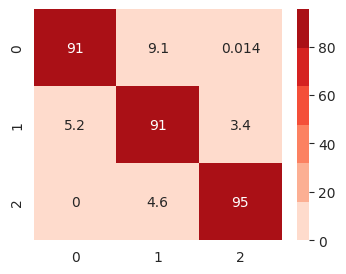

In [ ]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train_smoteTomek, y_train_smoteTomek)

RF_prediction_smoteTomek = model_RF.predict(X_test_smoteTomek)
print ("Accuracy of Random Forest after SMOTETomek = ", metrics.accuracy_score(y_test_smoteTomek, RF_prediction_smoteTomek))
print()

(unique, counts) = np.unique(RF_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, RF_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, RF_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, RF_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, RF_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

KNN

Accuracy =  0.9039305386985342

Count of predicted labels:  [0 1 2] [6633 7655 7134]

Confusion Metrics after SMOTETomek: 
 [[6233  893    5]
 [ 400 6359  357]
 [   0  403 6772]]

Precision Values for:  0.9066913070135932
Recall Values for:  0.9039305386985342
F-Measure Values for:  0.9053088180980472


<Axes: >

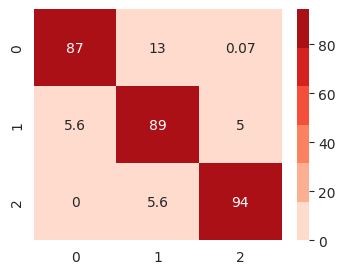

In [ ]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_smoteTomek, y_train_smoteTomek)

KNN_prediction_smoteTomek = model_KNN.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, KNN_prediction_smoteTomek))
print()

(unique, counts) = np.unique(KNN_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, KNN_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, KNN_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, KNN_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, KNN_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

Decision Tree

Accuracy =  0.900196060125105

Count of predicted labels:  [0 1 2] [6999 7244 7179]

Confusion Metrics after SMOTETomek: 
 [[6370  757    4]
 [ 625 6115  376]
 [   4  372 6799]]

Precision Values for:  0.9005834231370637
Recall Values for:  0.900196060125105
F-Measure Values for:  0.9003896999685419


<Axes: >

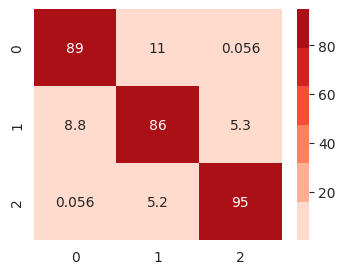

In [ ]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_smoteTomek, y_train_smoteTomek)

DT_prediction_smoteTomek = model_DT.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, DT_prediction_smoteTomek))
print()

(unique, counts) = np.unique(DT_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, DT_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, DT_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, DT_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, DT_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

AdaBoost

Accuracy =  0.8287741574082719

Count of predicted labels:  [0 1 2] [7247 6384 7791]

Confusion Metrics after SMOTETomek: 
 [[6245  886    0]
 [1002 4916 1198]
 [   0  582 6593]]

Precision Values for:  0.8260870088427332
Recall Values for:  0.8287741574082719
F-Measure Values for:  0.8274284014417576


<Axes: >

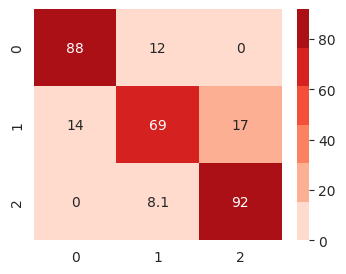

In [ ]:
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost.fit(X_train_smoteTomek, y_train_smoteTomek)

AdaBoost_prediction_smoteTomek = model_AdaBoost.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, AdaBoost_prediction_smoteTomek))
print()

(unique, counts) = np.unique(AdaBoost_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, AdaBoost_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, AdaBoost_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, AdaBoost_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, AdaBoost_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

XGBOOST

Accuracy =  0.900896274857623

Count of predicted labels:  [0 1 2] [6934 7452 7036]

Confusion Metrics after SMOTETomek: 
 [[6404  726    1]
 [ 530 6223  363]
 [   0  503 6672]]

Precision Values for:  0.9024444563647981
Recall Values for:  0.900896274857623
F-Measure Values for:  0.9016697010485081


<Axes: >

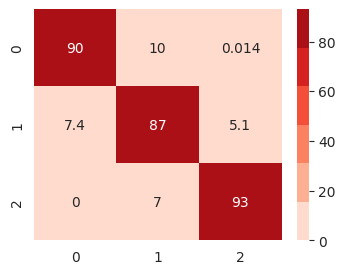

In [ ]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train_smoteTomek, y_train_smoteTomek)

XGB_prediction_smoteTomek = model_XGB.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, XGB_prediction_smoteTomek))
print()

(unique, counts) = np.unique(XGB_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, XGB_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, XGB_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, XGB_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, XGB_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

Light GBM

Accuracy =  0.8938007655681075

Count of predicted labels:  [0 1 2] [6906 7488 7028]

Confusion Metrics after SMOTETomek: 
 [[6357  773    1]
 [ 549 6165  402]
 [   0  550 6625]]

Precision Values for:  0.8956404657987017
Recall Values for:  0.8938007655681075
F-Measure Values for:  0.8947196699979919


<Axes: >

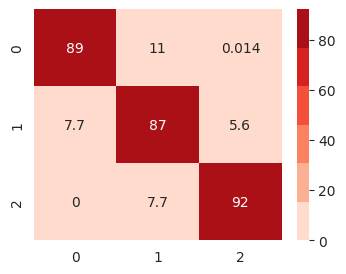

In [ ]:
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train_smoteTomek, y_train_smoteTomek)

LGBM_prediction_smoteTomek = model_LGBM.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, LGBM_prediction_smoteTomek))
print()

(unique, counts) = np.unique(LGBM_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, LGBM_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, LGBM_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, LGBM_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, LGBM_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

GAUSSIAN MAIVE BAYES

Accuracy =  0.828727476426104

Count of predicted labels:  [0 1 2] [6249 7617 7556]

Confusion Metrics after SMOTETomek: 
 [[5759 1372    0]
 [ 490 5532 1094]
 [   0  713 6462]]

Precision Values for:  0.8344758699282504
Recall Values for:  0.828727476426104
F-Measure Values for:  0.8315917393263562


<Axes: >

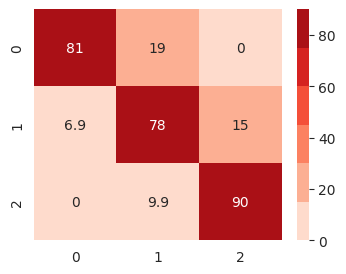

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train_smoteTomek, y_train_smoteTomek)

NB_prediction_smoteTomek = model_NB.predict(X_test_smoteTomek)
print ("Accuracy = ", metrics.accuracy_score(y_test_smoteTomek, NB_prediction_smoteTomek))
print()

(unique, counts) = np.unique(NB_prediction_smoteTomek, return_counts=True)
print("Count of predicted labels: ",unique, counts)
print()

#Confusion Matrix
cm = confusion_matrix(y_test_smoteTomek, NB_prediction_smoteTomek)
print("Confusion Metrics after SMOTETomek: \n",cm)
print()

#Print individual precision values
precision_value = metrics.precision_score(y_test_smoteTomek, NB_prediction_smoteTomek, average= 'weighted')
print("Precision Values for: ", precision_value)

#Print individual recall values
recall_value = metrics.recall_score(y_test_smoteTomek, NB_prediction_smoteTomek, average= 'weighted')
print("Recall Values for: ", recall_value)

#Print individual F-measure values
f_score = (2*precision_value * recall_value)/(precision_value + recall_value)
print("F-Measure Values for: ", f_score)

c_m = pd.DataFrame(confusion_matrix(y_test_smoteTomek, NB_prediction_smoteTomek, normalize ='true')*100)
plt.figure(figsize=(4,3))
colormap = sns.color_palette("Reds")
sns.heatmap(c_m, annot=True,cmap=colormap)

#ANN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn import metrics

In [ ]:
import tensorflow as tf

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=500, activation='relu'))
# ann2.add(tf.keras.layers.Dense(units=250, activation='relu'))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
ann.fit(x_train, y_train ,batch_size = 32, epochs = 10,verbose=2)

Epoch 1/10
1532/1532 - 10s - loss: 0.1276 - 10s/epoch - 7ms/step
Epoch 2/10
1532/1532 - 8s - loss: 0.1006 - 8s/epoch - 5ms/step
Epoch 3/10
1532/1532 - 4s - loss: 0.0974 - 4s/epoch - 2ms/step
Epoch 4/10
1532/1532 - 4s - loss: 0.0958 - 4s/epoch - 2ms/step
Epoch 5/10
1532/1532 - 5s - loss: 0.0938 - 5s/epoch - 3ms/step
Epoch 6/10
1532/1532 - 4s - loss: 0.0929 - 4s/epoch - 3ms/step
Epoch 7/10
1532/1532 - 4s - loss: 0.0910 - 4s/epoch - 2ms/step
Epoch 8/10
1532/1532 - 4s - loss: 0.0901 - 4s/epoch - 2ms/step
Epoch 9/10
1532/1532 - 5s - loss: 0.0890 - 5s/epoch - 3ms/step
Epoch 10/10
1532/1532 - 4s - loss: 0.0891 - 4s/epoch - 2ms/step


In [ ]:
ann_pred = ann.predict(x_test)

383/383 [==============================] - 1s 1ms/step


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, ann_pred) # evaluate the performance of the model
rmse = np.sqrt(mse)
r2 = r2_score(y_test,ann_pred)
print(mse)
print(rmse)
print(r2)

0.08573513058850656
0.29280561912044406
0.8674413589669094
